In [1]:
import pandas as pd
import numpy as np
import tqdm
# import gc
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16.0, 9.0)
import seaborn as sns

In [2]:
plt.rcParams['figure.figsize'] = (16.0, 9.0)

# Data

## Risk Free rate

Risk free rate is from RESSET database. 
Specifically,
1. 本表提供用于研究的日无风险收益数据。
2. 数据选择标准： 开始--2002年8月6日用三个月期定期银行存款利率； 2002年8月7日--2006年10月7日用三个月期中央银行票据的票面利率； 2006年10月8日--当前,用上海银行间3个月同业拆放利率。
3. 本表已将年度化的基准利率转化为以日为单位计量的收益数据，研究时可直接引用。

In [3]:
# Data is uploaded into uqer, but where is it?
! ls

1-EDA.ipynb			 experiments
2-sort_FMreg_on_beta_size.ipynb  fillna_example.ipynb
3-FF3.ipynb			 index_df_21_22.pkl
4-momentum_reversal.ipynb	 IPO
5-daily_factors.ipynb		 myutils
5-liquidity_volatility.ipynb	 output_data
6-backtest.ipynb		 __pycache__
6-factor_application.ipynb	 quant.png
7-crs_and_timing.ipynb		 reversal.ipynb
7-ta_test.ipynb			 stk_df2.pkl
8-ta_ML.ipynb			 strategy_example_202403.ipynb
data				 Untitled1.ipynb
exam				 Untitled.ipynb
exercises


In [4]:
! ls ..

datas  nbconvert	notebook_secret  notes_py3
lib    nbsignatures.db	notes		 runtime


In [7]:
# 👇 There it is!
# ! ls ../datas

In [8]:
rf_df = pd.read_csv('./data/rf-daily-2024.csv')

In [9]:
rf_df.head()

日期_Date  日无风险收益率_DRFRet  Unnamed: 2
0  2000-01-01        0.000054         NaN
1  2000-01-02        0.000054         NaN
2  2000-01-03        0.000054         NaN
3  2000-01-04        0.000054         NaN
4  2000-01-05        0.000054         NaN

In [10]:
rf_df.tail()

日期_Date  日无风险收益率_DRFRet  Unnamed: 2
8822  2024-02-26        0.000068         NaN
8823  2024-02-27        0.000068         NaN
8824  2024-02-28        0.000068         NaN
8825  2024-02-29        0.000068         NaN
8826  2024-03-01        0.000068         NaN

In [11]:
rf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8827 entries, 0 to 8826
Data columns (total 3 columns):
日期_Date           8827 non-null object
日无风险收益率_DRFRet    8827 non-null float64
Unnamed: 2        0 non-null float64
dtypes: float64(2), object(1)
memory usage: 207.0+ KB


In [12]:
rf_df.drop('Unnamed: 2',axis=1,inplace=True)

In [13]:
rf_df.rename(columns={'日无风险收益率_DRFRet':'rf','日期_Date':'date'},inplace=True)

In [14]:
# 另一种改名方式
# rf_df.columns = ['a','b']

In [15]:
rf_df['date'] = pd.to_datetime(rf_df['date'], format='%Y-%m-%d')

In [16]:
rf_df.head()

date        rf
0 2000-01-01  0.000054
1 2000-01-02  0.000054
2 2000-01-03  0.000054
3 2000-01-04  0.000054
4 2000-01-05  0.000054

In [17]:
stk_info = DataAPI.SecIDGet(assetClass="E",pandas="1")

In [20]:
stk_info

secID  ticker               secShortName               cnSpell  \
0      000001.XSHE  000001                       平安银行                  PAYH   
1      000002.XSHE  000002                        万科A                   WKA   
2      000003.XSHE  000003                      PT金田A                 PTJTA   
3      000004.XSHE  000004                       国华网安                  GHWA   
4      000005.XSHE  000005                       ST星源                  STXY   
5      000006.XSHE  000006                       深振业A                  SZYA   
6      000007.XSHE  000007                      *ST全新                 *STQX   
7      000008.XSHE  000008                       神州高铁                  SZGT   
8      000009.XSHE  000009                       中国宝安                  ZGBA   
9       00001.XHKG   00001                         长和                    CH   
10     000010.XSHE  000010                       美丽生态                  MLST   
11     000011.XSHE  000011                       深物业A                  SWYA   
12     000012.XSHE  000012                        南玻A                   NBA   
13     000013.XSHE  000013                     *ST石化A                   NaN   
14     000014.XSHE  000014                       沙河股份                  SHGF   
15     000015.XSHE  000015                      PT中浩A                 PTZHA   
16     000016.XSHE  000016                       深康佳A                  SKJA   
17     000017.XSHE  000017                       深中华A                  SZHA   
18     000018.XSHE  000018                       神城A退                  SCAT   
19     000019.XSHE  000019                       深粮控股                  SLKG   
20      00002.XHKG   00002                       中电控股                  ZDKG   
21     000020.XSHE  000020                       深华发A                  SHFA   
22     000021.XSHE  000021                        深科技                   SKJ   
23     000022.XSHE  000022                       深赤湾A                  SCWA   
24     000023.XSHE  000023                       ST深天                  STST   
25     000024.XSHE  000024                       招商地产                  ZSDC   
26     000025.XSHE  000025                        特力A                   TLA   
27     000026.XSHE  000026                        飞亚达                   FYD   
28     000027.XSHE  000027                       深圳能源                  SZNY   
29     000028.XSHE  000028                       国药一致                  GYYZ   
...            ...     ...                        ...                   ...   
37096     ZKH.XNYS     ZKH                        震坤行                   ZKX   
37097    ZKIN.XNAS    ZKIN                       正康国际                  ZKGJ   
37098    ZLAB.XNAS    ZLAB                       再鼎医药                  ZDYY   
37099      ZM.XNAS      ZM                ZoomVideo通讯           ZoomVideoTX   
37100     ZME.XNYS     ZME                       掌门教育                  ZMJY   
37101    ZNGA.XNAS    ZNGA            ZYNGA INC- CL A       ZYNGA INC- CL A   
37102     ZNH.XNYS     ZNH                       南方航空                  NFHK   
37103    ZNTE.XNAS    EVEX                   EVE HOLD              EVE HOLD   
37104   ZNTEU.XNAS   ZNTEU           ZANITE ACQUISITI      ZANITE ACQUISITI   
37105    ZNTL.XNAS    ZNTL              ZENTALIS PHAR         ZENTALIS PHAR   
37106     ZOM.AMXO     ZOM                   ZOMEDICA              ZOMEDICA   
37107    ZOOM.XNAS    ZOOM                       zoom                   NaN   
37108      ZS.XNAS      ZS                    ZSCALER               ZSCALER   
37109    ZSAN.XNAS    ZSAN  Zosano Pharma Corporation  Zosano Pharma Cor...   
37110      ZT.XNAS      ZT              ZIMMER ENERGY         ZIMMER ENERGY   
37111   ZTAQU.XNAS   ZTAQU           ZIMMER ENERGY TR      ZIMMER ENERGY TR   
37112    ZTEK.XNAS    ZTEK                     ZENTEK                ZENTEK   
37113     ZTO.XNYS     ZTO                       中通快递                  ZTKD   
37114     ZTS.XNYS     ZTS                         硕腾          

In [21]:
stk_info['exchangeCD'].unique()

array(['XSHE', 'XHKG', 'NOBB', 'XKRX', 'XTAI', 'XKOS', 'XBEI', 'XTKS',
       'XSHG', 'XXSC', 'XASX', 'XSES', 'XNYS', 'XNAS', 'AMXO', 'XNSE',
       'XIDX', 'OOTC', 'XJSE', 'TMXS', 'XBOM', 'XKLS', 'XSWX', 'XBKK',
       'XLON', 'HOSE', 'XPHS', 'XMIC', 'XMIL', 'XPAR', 'EURO', 'XSAO'],
      dtype=object)

In [22]:
stk_info = DataAPI.SecIDGet(assetClass="E",pandas="1")
stk_id = stk_info['secID']
index_info = DataAPI.SecIDGet(assetClass="IDX",pandas="1")

In [23]:
stk_info.head()

secID  ticker secShortName cnSpell exchangeCD assetClass  \
0  000001.XSHE  000001         平安银行    PAYH       XSHE          E   
1  000002.XSHE  000002          万科A     WKA       XSHE          E   
2  000003.XSHE  000003        PT金田A   PTJTA       XSHE          E   
3  000004.XSHE  000004         国华网安    GHWA       XSHE          E   
4  000005.XSHE  000005         ST星源    STXY       XSHE          E   

  listStatusCD    listDate transCurrCD          ISIN  partyID  delistDate  
0            L  1991-04-03         CNY  CNE000000040      2.0         NaN  
1            L  1991-01-29         CNY  CNE0000000T2      3.0         NaN  
2           DE  1991-07-03         CNY  CNE1000031Y5      4.0  2002-06-14  
3            L  1991-01-14         CNY  CNE0000000Y2      5.0         NaN  
4            L  1990-12-10         CNY  CNE0000001L7      6.0         NaN

In [24]:
index_info.head()

secID       ticker secShortName  cnSpell exchangeCD assetClass  \
0  000001.ESCI.XZCE  000001.ESCI       易盛农期综指   YSNQZZ       XZCE        IDX   
1       000001.ZICN       000001         上证综指     SZZZ       XSHG        IDX   
2  000001CNY01.XSHG  000001CNY01      上证指数(全)  SZZS(Q)       XSHG        IDX   
3  000002.ESCI.XZCE  000002.ESCI       易盛农期谷物   YSNQGW       XZCE        IDX   
4       000002.ZICN       000002         上证A股     SZAG       XSHG        IDX   

  listStatusCD    listDate transCurrCD          ISIN  partyID delistDate  
0            L         NaN         CNY           NaN  27145.0        NaN  
1            L  1991-07-15         CNY  CNM000000019  17764.0        NaN  
2            L  2020-10-09         CNY           NaN  17764.0        NaN  
3            L  2018-10-22         CNY           NaN  27145.0        NaN  
4            L  1992-02-21         CNY  CNM000000027  17764.0        NaN

In [25]:
index_info['secID'].nunique()

22810

## Market Index return

In [27]:
index_info[index_info['secShortName'].isin(['上证综指','深证综指','创业板指','沪深300','中证500','中证1000'])]

secID  ticker secShortName cnSpell exchangeCD assetClass  \
1      000001.ZICN  000001         上证综指    SZZZ       XSHG        IDX   
175    000300.ZICN  000300        沪深300   HS300       XSHG        IDX   
327    000852.ZICN  000852       中证1000  ZZ1000       XSHG        IDX   
346    000905.ZICN  000905        中证500   ZZ500       XSHG        IDX   
3894   399006.ZICN  399006         创业板指    CYBZ       XSHE        IDX   
3916   399106.ZICN  399106         深证综指    SZZZ       XSHE        IDX   
3969   399300.ZICN  399300        沪深300   HS300       XSHE        IDX   
4214   399852.XSHE  399852       中证1000  ZZ1000       XSHE        IDX   
4218   399905.ZICN  399905        中证500   ZZ500       XSHE        IDX   
18136     CNT.XSHE     CNT         创业板指    CYBZ       XSHE        IDX   
18149  CSI300.XHKG  CSI300        沪深300   HS300       XHKG        IDX   

      listStatusCD    listDate transCurrCD          ISIN  partyID delistDate  
1                L  1991-07-15         CNY  CNM000000019  17764.0        NaN  
175              L  2005-04-08         CNY  CNM0000001Y0  17768.0        NaN  
327              L  2014-10-17         CNY           NaN  17768.0        NaN  
346              L  2007-01-15         CNY  CNM0000007J8  17768.0        NaN  
3894             L  2010-06-01         CNY           NaN  17765.0        NaN  
3916             L  1991-04-04         CNY  CNM000000001  17765.0        NaN  
3969             L  2005-04-08         CNY  CNM0000001Y0  17768.0        NaN  
4214             L  2014-10-17         CNY           NaN  17768.0        NaN  
4218             L  2007-01-15         CNY  CNM0000007J8  17768.0        NaN  
18136            L  2010-06-01         CNY           NaN  17765.0        NaN  
18149            L  2005-04-08         CNY           NaN  17768.0        NaN

In [28]:
index_info[index_info['secShortName'].isin(['上证综指','深证综指','创业板指','沪深300','中证500','中证1000'])].drop_duplicates('secShortName').secID.values

array(['000001.ZICN', '000300.ZICN', '000852.ZICN', '000905.ZICN',
       '399006.ZICN', '399106.ZICN'], dtype=object)

In [29]:
sec_id = index_info[index_info['secShortName'].isin(['上证综指','深证综指','创业板指','沪深300','中证500','中证1000'])].drop_duplicates('secShortName').secID.values
start = '20000101'
end = '20241231'
index_df = DataAPI.MktIdxdGet(indexID=sec_id,beginDate=start,endDate=end,field=['indexID','secShortName','tradeDate','closeIndex','turnoverVol','turnoverValue','CHGPct'],pandas="1")

In [30]:
index_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29790 entries, 0 to 29789
Data columns (total 7 columns):
indexID          29790 non-null object
secShortName     29790 non-null object
tradeDate        29790 non-null object
closeIndex       29790 non-null float64
turnoverVol      29070 non-null float64
turnoverValue    29070 non-null float64
CHGPct           29790 non-null float64
dtypes: float64(4), object(3)
memory usage: 1.6+ MB


In [31]:
index_df['tradeDate'] = pd.to_datetime(index_df['tradeDate'],format='%Y-%m-%d')

In [32]:
index_df.head()

indexID secShortName  tradeDate  closeIndex   turnoverVol  \
0  000001.ZICN         上证综指 2000-01-04    1406.371  9.034023e+08   
1  000001.ZICN         上证综指 2000-01-05    1409.682  1.057998e+09   
2  000001.ZICN         上证综指 2000-01-06    1463.942  1.348052e+09   
3  000001.ZICN         上证综指 2000-01-07    1516.604  3.451570e+09   
4  000001.ZICN         上证综指 2000-01-10    1545.112  3.125354e+09   

   turnoverValue    CHGPct  
0   5.183898e+09  0.029117  
1   8.137326e+09  0.002354  
2   9.520842e+09  0.038491  
3   1.948719e+10  0.035973  
4   1.877911e+10  0.018797

In [33]:
index_ret_df = index_df.pivot(index='tradeDate',columns='secShortName',values='CHGPct')

In [34]:
index_ret_df.head()

secShortName      上证综指  中证1000  中证500  创业板指  沪深300      深证综指
tradeDate                                                   
2000-01-04    0.029117     NaN    NaN   NaN    NaN  0.031088
2000-01-05    0.002354     NaN    NaN   NaN    NaN  0.003075
2000-01-06    0.038491     NaN    NaN   NaN    NaN  0.041107
2000-01-07    0.035973     NaN    NaN   NaN    NaN  0.037170
2000-01-10    0.018797     NaN    NaN   NaN    NaN  0.021311

In [35]:
rf_df.set_index('date',inplace=True)

In [36]:
rf_df.head()

rf
date                
2000-01-01  0.000054
2000-01-02  0.000054
2000-01-03  0.000054
2000-01-04  0.000054
2000-01-05  0.000054

In [37]:
index_ret_df = pd.merge(index_ret_df,rf_df,left_index=True,right_index=True)

In [38]:
index_ret_df.head()

上证综指  中证1000  中证500  创业板指  沪深300      深证综指        rf
2000-01-04  0.029117     NaN    NaN   NaN    NaN  0.031088  0.000054
2000-01-05  0.002354     NaN    NaN   NaN    NaN  0.003075  0.000054
2000-01-06  0.038491     NaN    NaN   NaN    NaN  0.041107  0.000054
2000-01-07  0.035973     NaN    NaN   NaN    NaN  0.037170  0.000054
2000-01-10  0.018797     NaN    NaN   NaN    NaN  0.021311  0.000054

In [39]:
index_retx_df = index_ret_df.iloc[:,:-1].sub(index_ret_df['rf'], axis=0) # 计算超额收益率

In [40]:
index_retx_df.head()

上证综指  中证1000  中证500  创业板指  沪深300      深证综指
2000-01-04  0.029063     NaN    NaN   NaN    NaN  0.031034
2000-01-05  0.002300     NaN    NaN   NaN    NaN  0.003021
2000-01-06  0.038437     NaN    NaN   NaN    NaN  0.041053
2000-01-07  0.035919     NaN    NaN   NaN    NaN  0.037116
2000-01-10  0.018743     NaN    NaN   NaN    NaN  0.021257

In [41]:
index_retx_df.tail()

上证综指    中证1000     中证500      创业板指     沪深300      深证综指
2024-02-26 -0.009339  0.005621 -0.000500 -0.003759 -0.010494  0.004303
2024-02-27  0.012850  0.026312  0.021555  0.024066  0.011929  0.023440
2024-02-28 -0.019179 -0.044929 -0.023384 -0.025157 -0.012809 -0.037984
2024-02-29  0.019311  0.037306  0.031326  0.033131  0.019010  0.033533
2024-03-01  0.003862  0.010659  0.005965  0.009340  0.006110  0.010717

In [42]:
# sec_id = index_info[index_info['secShortName'].isin(['上证综指','深证综指','创业板指','沪深300','中证500','中证1000'])].drop_duplicates('secShortName').secID.values
# start = '20000101'
# end = '20241231'
# index_df = DataAPI.MktIdxdGet(indexID=sec_id,beginDate=start,endDate=end,field=['indexID','secShortName','tradeDate','closeIndex','turnoverVol','turnoverValue','CHGPct'],pandas="1")
# index_df['tradeDate'] = pd.to_datetime(index_df['tradeDate'],format='%Y-%m-%d')
# index_ret_df = index_df.pivot(index='tradeDate',columns='secShortName',values='CHGPct')
# index_ret_df = pd.merge(index_ret_df,rf_df,left_index=True,right_index=True)
# index_retx_df = index_ret_df.iloc[:,:-1].sub(index_ret_df['rf'], axis=0)

### Market Index Return Plot

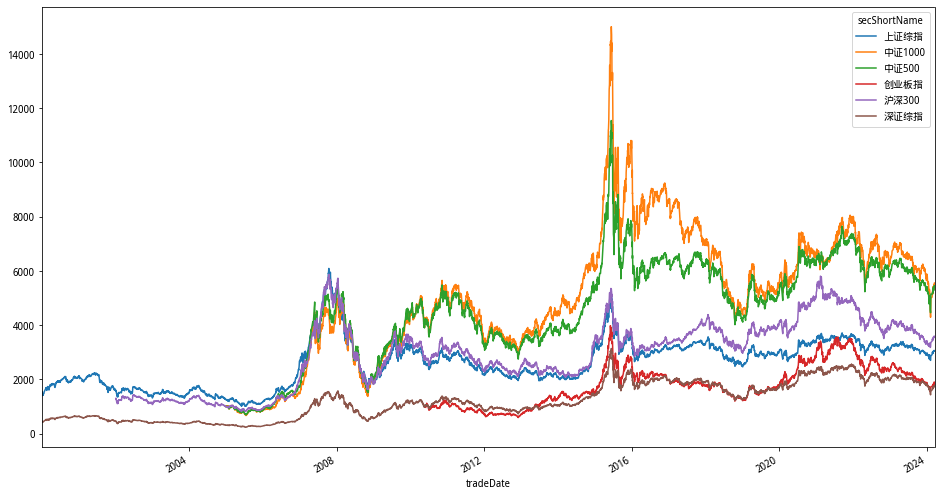

In [43]:
# Raw index plot
index_df.pivot(index='tradeDate',columns='secShortName',values='closeIndex').plot()

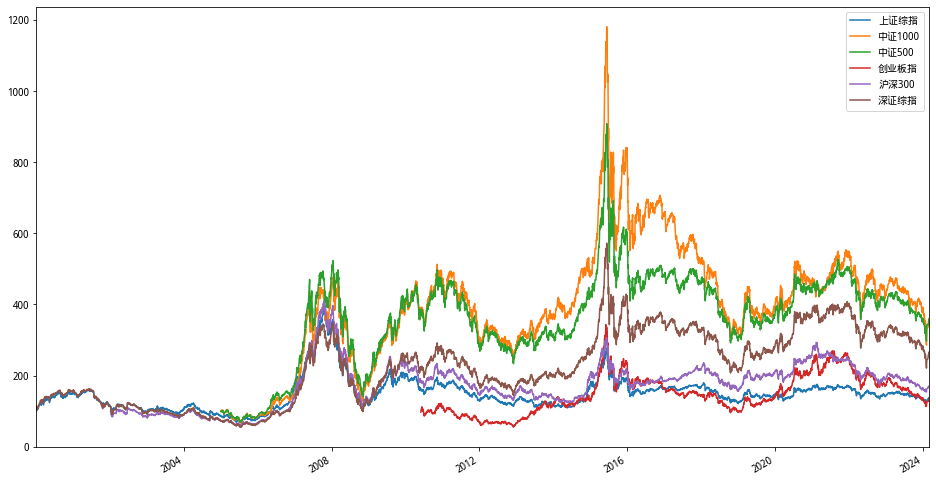

In [44]:
((1 + index_retx_df).cumprod()*100).plot()

早期的平稳可能是一种假象：数据到后面会越来越大。log return会看得更清楚

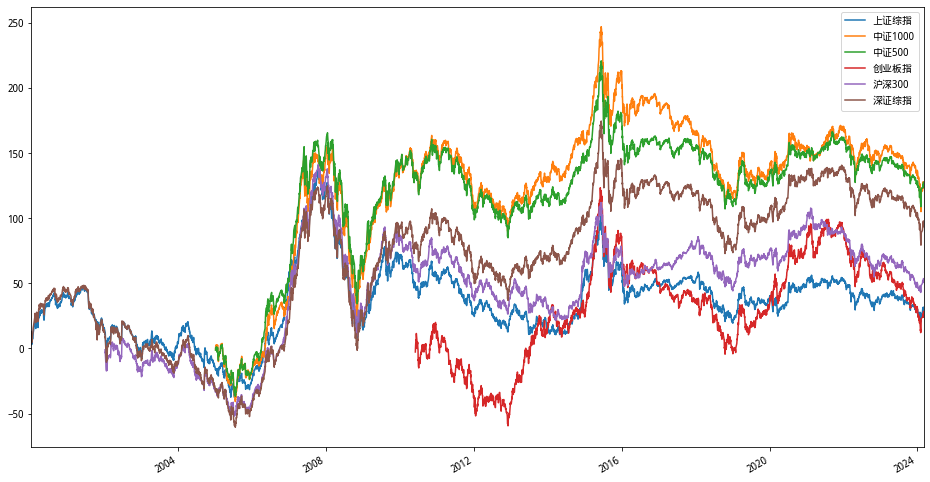

In [45]:
# log return
(np.log(1 + index_retx_df).cumsum()*100).plot()

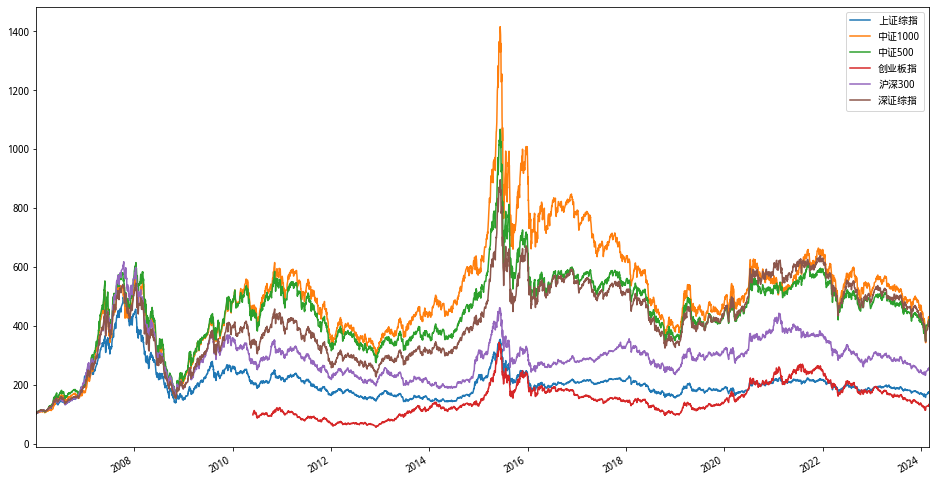

In [47]:
((1 + index_retx_df.loc['2006':'2024']).cumprod()*100).plot()

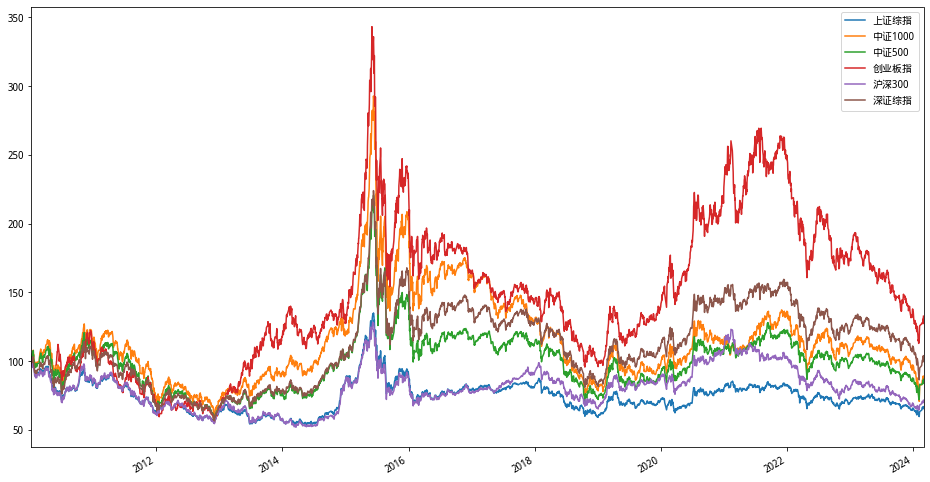

In [48]:
((1 + index_retx_df.loc['2010':'2024']).cumprod()*100).plot()

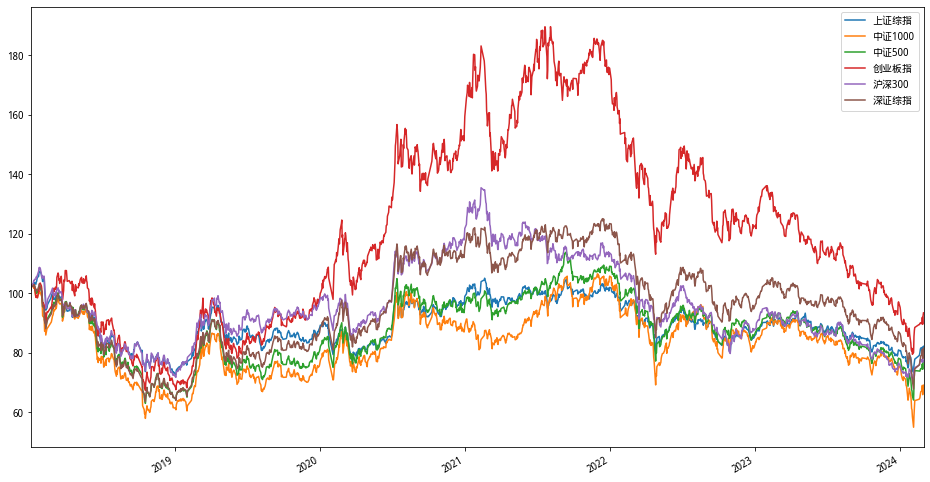

In [49]:
((1 + index_retx_df.loc['2018':'2024']).cumprod()*100).plot()

In [50]:
index_retx_df.describe()

上证综指       中证1000        中证500         创业板指        沪深300  \
count  5854.000000  4654.000000  4654.000000  3340.000000  5374.000000   
mean      0.000164     0.000461     0.000446     0.000265     0.000226   
std       0.014816     0.019188     0.018457     0.018964     0.015883   
min      -0.088484    -0.087943    -0.089605    -0.089187    -0.092478   
25%      -0.006430    -0.007980    -0.007644    -0.009973    -0.007276   
50%       0.000435     0.001749     0.001447     0.000182     0.000402   
75%       0.007084     0.010974     0.010324     0.010810     0.007783   
max       0.098516     0.097469     0.098603     0.071505     0.093851   

              深证综指  
count  5854.000000  
mean      0.000308  
std       0.016743  
min      -0.085510  
25%      -0.007565  
50%       0.001159  
75%       0.009256  
max       0.096788

In [53]:
0.019465*np.sqrt(240) # 2023计算

0.3015504833357095

In [54]:
0.015047*np.sqrt(240) # 2023计算

0.23310712164153202

In [55]:
0.019188*np.sqrt(240) # 2024 中证1000波动率

0.29725921778811165

In [56]:
0.015883*np.sqrt(240) # 2024 沪深300波动率

0.24605837795124963

## Market return in US

In [59]:
us_df = pd.read_csv('./data/F-F_Research_Data_Factors_daily_2024.csv',skiprows=3)
us_df.drop(us_df.index.values[-1],inplace=True)

In [61]:
us_df.head()

Unnamed: 0  Mkt-RF   SMB   HML     RF
0   19260701    0.10 -0.25 -0.27  0.009
1   19260702    0.45 -0.33 -0.06  0.009
2   19260706    0.17  0.30 -0.39  0.009
3   19260707    0.09 -0.58  0.02  0.009
4   19260708    0.21 -0.38  0.19  0.009

In [62]:
us_df.rename(columns={'Unnamed: 0': 'date'},inplace=True)

In [63]:
us_df['date'] = pd.to_datetime(us_df['date'],format='%Y%m%d')

In [64]:
us_df['Mkt-RF'] = us_df['Mkt-RF']*0.01
us_df.set_index('date',inplace=True)

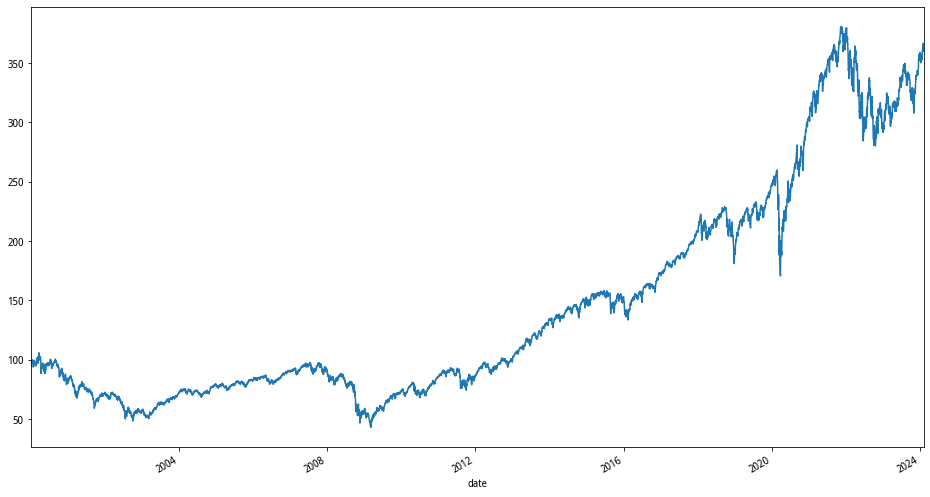

In [65]:
((1 + us_df.loc['2000':'2024','Mkt-RF']).cumprod()*100).plot()

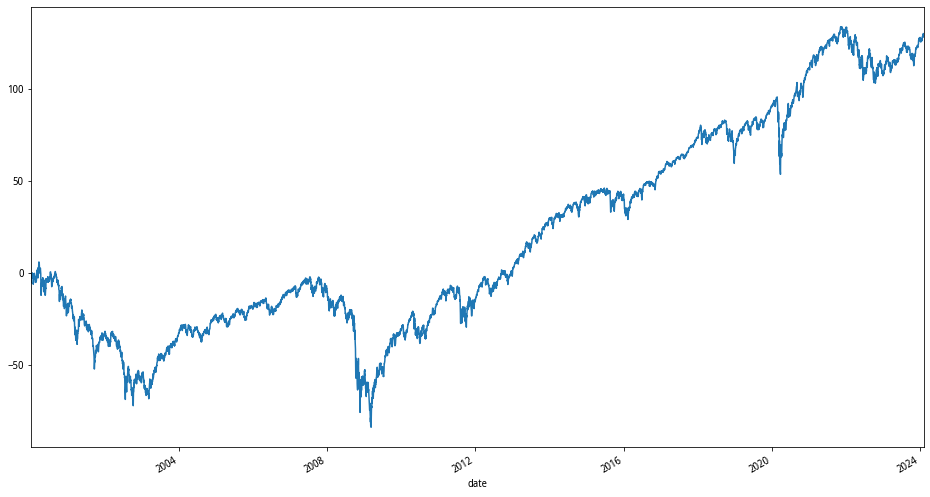

In [66]:
(np.log(1 + us_df.loc['2000':'2024','Mkt-RF']).cumsum()*100).plot()

In [67]:
us_df.loc['2000':'2024','Mkt-RF'].describe()

count    6058.000000
mean        0.000290
std         0.012525
min        -0.120000
25%        -0.005000
50%         0.000600
75%         0.006200
max         0.113500
Name: Mkt-RF, dtype: float64

In [58]:
0.012682*np.sqrt(250) # 2023 波动率

0.20052002643127695

In [68]:
0.012525*np.sqrt(250)

0.19803763846804476

## Industry Index Return

In [69]:
# 2024, https://www.swsresearch.com/institute_sw/allIndex/downloadCenter/industryType

shenwan_industry_idx1 = ["农林牧渔","基础化工","钢铁","有色金属","电子","家用电器","食品饮料","纺织服饰","轻工制造","医药生物","公用事业","交通运输","房地产","商贸零售","社会服务","综合","建筑材料","建筑装饰","电力设备","国防军工","计算机","传媒","通信","银行","非银金融","汽车","机械设备","煤炭","石油石化","环保","美容护理"]

# shenwan_industry_idx1 = ['传媒','电力设备','电子','房地产','纺织服饰','非银金融','钢铁','公用事业','国防军工','环保','机械设备','基础化工','计算机','家用电器','建筑材料','建筑装饰','交通运输','煤炭','美容护理','农林牧渔','社会服务','石油石化','食品饮料','汽车','轻工制造','通信','综合','医药生物','银行','有色金属','商贸零售'] 

# shenwan_industry_idx1 = ["农林牧渔","基础化工","钢铁","有色金属","电子","家用电器","食品饮料","纺织服饰","轻工制造","医药生物","公用事业","交通运输","房地产","商贸零售","社会服务","综合","建筑材料","建筑装饰","电力设备","国防军工","计算机","传媒","通信","银行","非银金融","汽车","机械设备","煤炭","石油石化","环保","美容护理"]

In [70]:
len(shenwan_industry_idx1)

31

In [71]:
index_info['secShortName'][(index_info['secShortName'].str.contains('申万'))]

7334            申万50
7335            申万中小
7336            申万A指
7337            申万创业
7338          申万A股主板
7339        申万宏源专精特新
7340          申万农林牧渔
7341           申万林业Ⅱ
7342         申万农产品加工
7343         申万农业综合Ⅱ
7344            申万饲料
7345            申万渔业
7346           申万种植业
7347           申万养殖业
7348         申万动物保健Ⅱ
7349         申万农业综合Ⅱ
7350            申万采掘
7351         申万煤炭开采Ⅱ
7352         申万其他采掘Ⅱ
7353         申万石油开采Ⅱ
7354          申万采掘服务
7355          申万基础化工
7356        申万化工新材料Ⅱ
7357          申万化学纤维
7358          申万化学原料
7359          申万化学制品
7360          申万石油化工
7361            申万塑料
7362            申万橡胶
7363          申万农化制品
            ...     
18300    通联全A-申万有色金属
18301    通联全A-申万建筑材料
18302    通联全A-申万建筑装饰
18303    通联全A-申万电气设备
18304    通联全A-申万机械设备
18305    通联全A-申万国防军工
18306      通联全A-申万汽车
18307      通联全A-申万电子
18308    通联全A-申万家用电器
18309    通联全A-申万食品饮料
18310    通联全A-申万纺织服装
18311    通联全A-申万轻工制造
18312    通联全A-申万医药生物
18313    通联全A-申万公用事业
18314    通联全A-申万交通运输
18315     通联全A-申万房地产
18316      通联

In [72]:
shenwan_industry_idx1 = ['申万' + indry for indry in shenwan_industry_idx1]

In [73]:
shenwan_industry_idx1

['申万农林牧渔',
 '申万基础化工',
 '申万钢铁',
 '申万有色金属',
 '申万电子',
 '申万家用电器',
 '申万食品饮料',
 '申万纺织服饰',
 '申万轻工制造',
 '申万医药生物',
 '申万公用事业',
 '申万交通运输',
 '申万房地产',
 '申万商贸零售',
 '申万社会服务',
 '申万综合',
 '申万建筑材料',
 '申万建筑装饰',
 '申万电力设备',
 '申万国防军工',
 '申万计算机',
 '申万传媒',
 '申万通信',
 '申万银行',
 '申万非银金融',
 '申万汽车',
 '申万机械设备',
 '申万煤炭',
 '申万石油石化',
 '申万环保',
 '申万美容护理']

In [74]:
len(shenwan_industry_idx1)

31

In [75]:
index_info['secShortName'][(index_info['secShortName'].str.contains('申万')) & 
                           (~index_info['secShortName'].str.contains('Ⅱ$'))]

7334            申万50
7335            申万中小
7336            申万A指
7337            申万创业
7338          申万A股主板
7339        申万宏源专精特新
7340          申万农林牧渔
7342         申万农产品加工
7344            申万饲料
7345            申万渔业
7346           申万种植业
7347           申万养殖业
7350            申万采掘
7354          申万采掘服务
7355          申万基础化工
7357          申万化学纤维
7358          申万化学原料
7359          申万化学制品
7360          申万石油化工
7361            申万塑料
7362            申万橡胶
7363          申万农化制品
7365            申万钢铁
7367          申万冶钢原料
7368            申万普钢
7370          申万有色金属
7371         申万金属新材料
7373           申万贵金属
7374           申万小金属
7375          申万工业金属
            ...     
18300    通联全A-申万有色金属
18301    通联全A-申万建筑材料
18302    通联全A-申万建筑装饰
18303    通联全A-申万电气设备
18304    通联全A-申万机械设备
18305    通联全A-申万国防军工
18306      通联全A-申万汽车
18307      通联全A-申万电子
18308    通联全A-申万家用电器
18309    通联全A-申万食品饮料
18310    通联全A-申万纺织服装
18311    通联全A-申万轻工制造
18312    通联全A-申万医药生物
18313    通联全A-申万公用事业
18314    通联全A-申万交通运输
18315     通联全A-申万房地产
18316      通联

In [68]:
index_info['secShortName'][index_info['secShortName'].str.contains('.*^申万Ⅰ$')]

Series([], Name: secShortName, dtype: object)

这个正则表达式 `.*^申万Ⅰ$` 可以分解如下：

1. `.*`: 表示匹配任意字符（除了行终止符）零次或多次。`.` 匹配任意单个字符，`*` 表示前一个字符或组的零次或多次出现。

2. `^`: 这是一个插入符号，表示行的开头。

3. `申万Ⅰ`: 这部分表示精确匹配字符序列 "申万Ⅰ"。

4. `$`: 这个美元符号表示行的结尾。

因此，将所有部分放在一起，这个正则表达式匹配以任意字符开头，接着是精确的序列 "申万Ⅰ"，然后紧跟着行结束。

In [76]:
index_info[index_info['secShortName'].isin(shenwan_industry_idx1)]

secID  ticker secShortName cnSpell exchangeCD assetClass  \
7340  801010.ZICN  801010       申万农林牧渔  SWNLMY       ZICN        IDX   
7355  801030.ZICN  801030       申万基础化工  SWJCHG       ZICN        IDX   
7365  801040.ZICN  801040         申万钢铁    SWGT       ZICN        IDX   
7370  801050.ZICN  801050       申万有色金属  SWYSJS       ZICN        IDX   
7389  801080.ZICN  801080         申万电子    SWDZ       ZICN        IDX   
7408  801110.ZICN  801110       申万家用电器  SWJYDQ       ZICN        IDX   
7416  801120.ZICN  801120       申万食品饮料  SWSPYL       ZICN        IDX   
7424  801130.ZICN  801130       申万纺织服饰  SWFZFS       ZICN        IDX   
7428  801140.ZICN  801140       申万轻工制造  SWQGZZ       ZICN        IDX   
7434  801150.ZICN  801150       申万医药生物  SWYYSW       ZICN        IDX   
7441  801160.ZICN  801160       申万公用事业  SWGYSY       ZICN        IDX   
7446  801170.ZICN  801170       申万交通运输  SWJTYS       ZICN        IDX   
7456  801180.ZICN  801180        申万房地产   SWFDC       ZICN        IDX   
7465  801200.ZICN  801200       申万商贸零售  SWSMLS       ZICN        IDX   
7473  801210.ZICN  801210       申万社会服务  SWSHFW       ZICN        IDX   
7488  801230.ZICN  801230         申万综合    SWZH       ZICN        IDX   
7500  801290.ZICN  801290       申万基础化工  SWJCHG       XSHG        IDX   
7511  801710.ZICN  801710       申万建筑材料  SWJZCL       ZICN        IDX   
7515  801720.ZICN  801720       申万建筑装饰  SWJZZS       ZICN        IDX   
7522  801730.ZICN  801730       申万电力设备  SWDLSB       ZICN        IDX   
7531  801740.ZICN  801740       申万国防军工  SWGFJG       ZICN        IDX   
7537  801750.ZICN  801750        申万计算机   SWJSJ       ZICN        IDX   
7540  801760.ZICN  801760         申万传媒    SWCM       ZICN        IDX   
7548  801770.ZICN  801770         申万通信    SWTX       ZICN        IDX   
7549  801780.ZICN  801780         申万银行    SWYH       ZICN        IDX   
7555  801790.ZICN  801790       申万非银金融  SWFYJR       ZICN        IDX   
7574  801880.ZICN  801880         申万汽车    SWQC       ZICN        IDX   
7576  801890.ZICN  801890       申万机械设备  SWJXSB       ZICN        IDX   
7580  801950.ZICN  801950         申万煤炭    SWMT       ZICN        IDX   
7583  801960.ZICN  801960       申万石油石化  SWSYSH       ZICN        IDX   
7587  801970.ZICN  801970         申万环保    SWHB       ZICN        IDX   
7590  801980.ZICN  801980       申万美容护理  SWMRHL       ZICN        IDX   

     listStatusCD    listDate transCurrCD ISIN  partyID  delistDate  
7340            L  2003-10-15         CNY  NaN  27540.0         NaN  
7355            L  2003-10-15         CNY  NaN  27540.0         NaN  
7365            L  2003-10-15         CNY  NaN  27540.0         NaN  
7370            L  2003-10-15         CNY  NaN  27540.0         NaN  
7389            L  2003-10-15         CNY  NaN  27540.0         NaN  
7408            L  2003-10-15         CNY  NaN  27540.0         NaN  
7416            L  2003-10-15         CNY  NaN  27540.0         NaN  
7424            L  2003-10-15         CNY  NaN  27540.0         NaN  
7428            L  2003-10-15         CNY  NaN  27540.0         NaN  
7434            L  2003-10-15         CNY  NaN  27540.0         NaN  
7441            L  2003-10-15         CNY  NaN  27540.0         NaN  
7446            L  2003-10-15         CNY  NaN  27540.0         NaN  
7456            L  2003-10-15         CNY  NaN  27540.0         NaN  
7465            L  2003-10-15         CNY  NaN  27540.0         NaN  
7473            L  2003-10-15         CNY  NaN  27540.0         NaN  
7488            L  2003-10-15         CNY  NaN  27540.0         NaN  
7500           DE  2012-10-08         CNY  NaN  27540.0  2014-09-01  
7511            L  2014-02-21         CNY  NaN  27540.0         NaN  
7515            L  2014-02-21         CNY  NaN  27540.0         NaN  
7522            L  2014-02-21         CNY  NaN  27540.0         NaN  
7531            L  2014-02-21         CNY  NaN  27540.0         NaN  
7537            L  2014-02-21         CNY  NaN  27540.0         NaN  
7540            L  2014-0

In [77]:
len(index_info[index_info['secShortName'].isin(shenwan_industry_idx1)])

32

In [78]:
index_info[index_info['secShortName'].isin(shenwan_industry_idx1)].duplicated('secShortName',keep=False)

7340    False
7355     True
7365    False
7370    False
7389    False
7408    False
7416    False
7424    False
7428    False
7434    False
7441    False
7446    False
7456    False
7465    False
7473    False
7488    False
7500     True
7511    False
7515    False
7522    False
7531    False
7537    False
7540    False
7548    False
7549    False
7555    False
7574    False
7576    False
7580    False
7583    False
7587    False
7590    False
dtype: bool

In [79]:
set(shenwan_industry_idx1) - set(index_info[index_info['secShortName'].isin(shenwan_industry_idx1)]['secShortName'])

set()

In [80]:
set(shenwan_industry_idx1).symmetric_difference(set(index_info[index_info['secShortName'].isin(shenwan_industry_idx1)]['secShortName']))

set()

#### The Industry index by Shenwan

In [81]:
index_info.loc[index_info['secShortName'].isin(shenwan_industry_idx1)].sort_values('secShortName')

secID  ticker secShortName cnSpell exchangeCD assetClass  \
7446  801170.ZICN  801170       申万交通运输  SWJTYS       ZICN        IDX   
7540  801760.ZICN  801760         申万传媒    SWCM       ZICN        IDX   
7441  801160.ZICN  801160       申万公用事业  SWGYSY       ZICN        IDX   
7340  801010.ZICN  801010       申万农林牧渔  SWNLMY       ZICN        IDX   
7434  801150.ZICN  801150       申万医药生物  SWYYSW       ZICN        IDX   
7465  801200.ZICN  801200       申万商贸零售  SWSMLS       ZICN        IDX   
7531  801740.ZICN  801740       申万国防军工  SWGFJG       ZICN        IDX   
7500  801290.ZICN  801290       申万基础化工  SWJCHG       XSHG        IDX   
7355  801030.ZICN  801030       申万基础化工  SWJCHG       ZICN        IDX   
7408  801110.ZICN  801110       申万家用电器  SWJYDQ       ZICN        IDX   
7511  801710.ZICN  801710       申万建筑材料  SWJZCL       ZICN        IDX   
7515  801720.ZICN  801720       申万建筑装饰  SWJZZS       ZICN        IDX   
7456  801180.ZICN  801180        申万房地产   SWFDC       ZICN        IDX   
7370  801050.ZICN  801050       申万有色金属  SWYSJS       ZICN        IDX   
7576  801890.ZICN  801890       申万机械设备  SWJXSB       ZICN        IDX   
7574  801880.ZICN  801880         申万汽车    SWQC       ZICN        IDX   
7580  801950.ZICN  801950         申万煤炭    SWMT       ZICN        IDX   
7587  801970.ZICN  801970         申万环保    SWHB       ZICN        IDX   
7522  801730.ZICN  801730       申万电力设备  SWDLSB       ZICN        IDX   
7389  801080.ZICN  801080         申万电子    SWDZ       ZICN        IDX   
7583  801960.ZICN  801960       申万石油石化  SWSYSH       ZICN        IDX   
7473  801210.ZICN  801210       申万社会服务  SWSHFW       ZICN        IDX   
7424  801130.ZICN  801130       申万纺织服饰  SWFZFS       ZICN        IDX   
7488  801230.ZICN  801230         申万综合    SWZH       ZICN        IDX   
7590  801980.ZICN  801980       申万美容护理  SWMRHL       ZICN        IDX   
7537  801750.ZICN  801750        申万计算机   SWJSJ       ZICN        IDX   
7428  801140.ZICN  801140       申万轻工制造  SWQGZZ       ZICN        IDX   
7548  801770.ZICN  801770         申万通信    SWTX       ZICN        IDX   
7365  801040.ZICN  801040         申万钢铁    SWGT       ZICN        IDX   
7549  801780.ZICN  801780         申万银行    SWYH       ZICN        IDX   
7555  801790.ZICN  801790       申万非银金融  SWFYJR       ZICN        IDX   
7416  801120.ZICN  801120       申万食品饮料  SWSPYL       ZICN        IDX   

     listStatusCD    listDate transCurrCD ISIN  partyID  delistDate  
7446            L  2003-10-15         CNY  NaN  27540.0         NaN  
7540            L  2014-02-21         CNY  NaN  27540.0         NaN  
7441            L  2003-10-15         CNY  NaN  27540.0         NaN  
7340            L  2003-10-15         CNY  NaN  27540.0         NaN  
7434            L  2003-10-15         CNY  NaN  27540.0         NaN  
7465            L  2003-10-15         CNY  NaN  27540.0         NaN  
7531            L  2014-02-21         CNY  NaN  27540.0         NaN  
7500           DE  2012-10-08         CNY  NaN  27540.0  2014-09-01  
7355            L  2003-10-15         CNY  NaN  27540.0         NaN  
7408            L  2003-10-15         CNY  NaN  27540.0         NaN  
7511            L  2014-02-21         CNY  NaN  27540.0         NaN  
7515            L  2014-02-21         CNY  NaN  27540.0         NaN  
7456            L  2003-10-15         CNY  NaN  27540.0         NaN  
7370            L  2003-10-15         CNY  NaN  27540.0         NaN  
7576            L  2014-02-21         CNY  NaN  27540.0         NaN  
7574            L  2014-02-21         CNY  NaN  27540.0         NaN  
7580            L  2021-12-13         CNY  NaN  27540.0         NaN  
7587            L  2021-12-13         CNY  NaN  27540.0         NaN  
7522            L  2014-02-21         CNY  NaN  27540.0         NaN  
7389            L  2003-10-15         CNY  NaN  27540.0         NaN  
7583            L  2021-12-13         CNY  NaN  27540.0         NaN  
7473            L  2003-10-15         CNY  NaN  27540.0         NaN  
7424            L  2003-1

In [82]:
industry_id = index_info.loc[index_info['secShortName'].isin(shenwan_industry_idx1)].drop_duplicates(keep='last').loc[:,'secID']

In [83]:
industry_id

7340    801010.ZICN
7355    801030.ZICN
7365    801040.ZICN
7370    801050.ZICN
7389    801080.ZICN
7408    801110.ZICN
7416    801120.ZICN
7424    801130.ZICN
7428    801140.ZICN
7434    801150.ZICN
7441    801160.ZICN
7446    801170.ZICN
7456    801180.ZICN
7465    801200.ZICN
7473    801210.ZICN
7488    801230.ZICN
7500    801290.ZICN
7511    801710.ZICN
7515    801720.ZICN
7522    801730.ZICN
7531    801740.ZICN
7537    801750.ZICN
7540    801760.ZICN
7548    801770.ZICN
7549    801780.ZICN
7555    801790.ZICN
7574    801880.ZICN
7576    801890.ZICN
7580    801950.ZICN
7583    801960.ZICN
7587    801970.ZICN
7590    801980.ZICN
Name: secID, dtype: object

In [84]:
index_df = DataAPI.MktIdxdGet(indexID=list(industry_id) + ['000001.ZICN'],beginDate="20031015",endDate="20241231",
                              field=['indexID','secShortName','tradeDate','preCloseIndex',
                                     'closeIndex','turnoverVol','turnoverValue','CHG','CHGPct'],pandas="1")
index_df['tradeDate'] = pd.to_datetime(index_df['tradeDate'],format='%Y-%m-%d')
index_ret_df = index_df.pivot(index='tradeDate',columns='indexID',values='CHGPct')
index_ret_df = pd.merge(index_ret_df,rf_df,left_index=True,right_index=True)
index_retx_df = index_ret_df.iloc[:,:-1].sub(index_ret_df['rf'], axis=0)

In [85]:
industry_id_name = dict(zip(index_df['indexID'],index_df['secShortName']))

In [86]:
industry_id_name

{'000001.ZICN': '上证综指',
 '801010.ZICN': '申万农林牧渔',
 '801030.ZICN': '申万基础化工',
 '801040.ZICN': '申万钢铁',
 '801050.ZICN': '申万有色金属',
 '801080.ZICN': '申万电子',
 '801110.ZICN': '申万家用电器',
 '801120.ZICN': '申万食品饮料',
 '801130.ZICN': '申万纺织服饰',
 '801140.ZICN': '申万轻工制造',
 '801150.ZICN': '申万医药生物',
 '801160.ZICN': '申万公用事业',
 '801170.ZICN': '申万交通运输',
 '801180.ZICN': '申万房地产',
 '801200.ZICN': '申万商贸零售',
 '801210.ZICN': '申万社会服务',
 '801230.ZICN': '申万综合',
 '801290.ZICN': '申万基础化工',
 '801710.ZICN': '申万建筑材料',
 '801720.ZICN': '申万建筑装饰',
 '801730.ZICN': '申万电力设备',
 '801740.ZICN': '申万国防军工',
 '801750.ZICN': '申万计算机',
 '801760.ZICN': '申万传媒',
 '801770.ZICN': '申万通信',
 '801780.ZICN': '申万银行',
 '801790.ZICN': '申万非银金融',
 '801880.ZICN': '申万汽车',
 '801890.ZICN': '申万机械设备',
 '801950.ZICN': '申万煤炭',
 '801960.ZICN': '申万石油石化',
 '801970.ZICN': '申万环保',
 '801980.ZICN': '申万美容护理'}

In [87]:
index_df.head()

indexID secShortName  tradeDate  preCloseIndex  closeIndex  \
0  000001.ZICN         上证综指 2003-10-15       1388.172    1383.098   
1  000001.ZICN         上证综指 2003-10-16       1383.098    1365.505   
2  000001.ZICN         上证综指 2003-10-17       1365.505    1370.582   
3  000001.ZICN         上证综指 2003-10-20       1370.582    1359.498   
4  000001.ZICN         上证综指 2003-10-21       1359.498    1364.301   

   turnoverVol  turnoverValue     CHG    CHGPct  
0  671017300.0   4.772951e+09  -5.074 -0.003655  
1  585887500.0   4.463241e+09 -17.593 -0.012720  
2  528554800.0   3.893039e+09   5.077  0.003718  
3  535722900.0   3.759462e+09 -11.084 -0.008087  
4  697888200.0   4.787531e+09   4.803  0.003533

In [88]:
index_retx_df.head()

000001.ZICN  801010.ZICN  801030.ZICN  801040.ZICN  801050.ZICN  \
2003-10-15    -0.003730    -0.004897    -0.002104    -0.000692    -0.002423   
2003-10-16    -0.012795    -0.016645    -0.012041    -0.008257    -0.000605   
2003-10-17     0.003643     0.000658     0.003923     0.006985    -0.000429   
2003-10-20    -0.008162    -0.007592    -0.007508     0.004683    -0.004754   
2003-10-21     0.003459     0.004975     0.002568     0.011718     0.008316   

            801080.ZICN  801110.ZICN  801120.ZICN  801130.ZICN  801140.ZICN  \
2003-10-15    -0.000160    -0.000950    -0.000379    -0.000555    -0.006021   
2003-10-16    -0.020983    -0.016202    -0.010727    -0.009225    -0.013666   
2003-10-17     0.003418     0.003256     0.001005    -0.000261     0.003411   
2003-10-20    -0.007695    -0.015114    -0.002786    -0.009900    -0.012482   
2003-10-21     0.006414     0.004014     0.001007    -0.000533    -0.000052   

            ...  801760.ZICN  801770.ZICN  801780.ZICN  801790.ZICN  \
2003-10-15  ...    -0.002227    -0.004183    -0.009015    -0.000382   
2003-10-16  ...    -0.038934    -0.010622    -0.007758    -0.011809   
2003-10-17  ...     0.003991     0.007493     0.001992    -0.008172   
2003-10-20  ...    -0.013761    -0.008072    -0.007533    -0.041855   
2003-10-21  ...     0.007289     0.004209    -0.015599    -0.002442   

            801880.ZICN  801890.ZICN  801950.ZICN  801960.ZICN  801970.ZICN  \
2003-10-15    -0.008126    -0.007362    -0.005163    -0.005211    -0.002654   
2003-10-16    -0.017021    -0.010059    -0.010085    -0.012954    -0.013539   
2003-10-17    -0.001675    -0.001646     0.002263     0.005544     0.004435   
2003-10-20    -0.008665    -0.012472     0.003845    -0.003705    -0.009598   
2003-10-21     0.002693     0.000308     0.003843     0.004290    -0.000925   

            801980.ZICN  
2003-10-15     0.000467  
2003-10-16    -0.024300  
2003-10-17     0.001165  
2003-10-20    -0.020807  
2003-10-21    -0.000008  

[5 rows x 33 columns]

In [89]:
index_retx_df.rename(mapper=industry_id_name, axis=1, inplace=True) # 将column名称改变

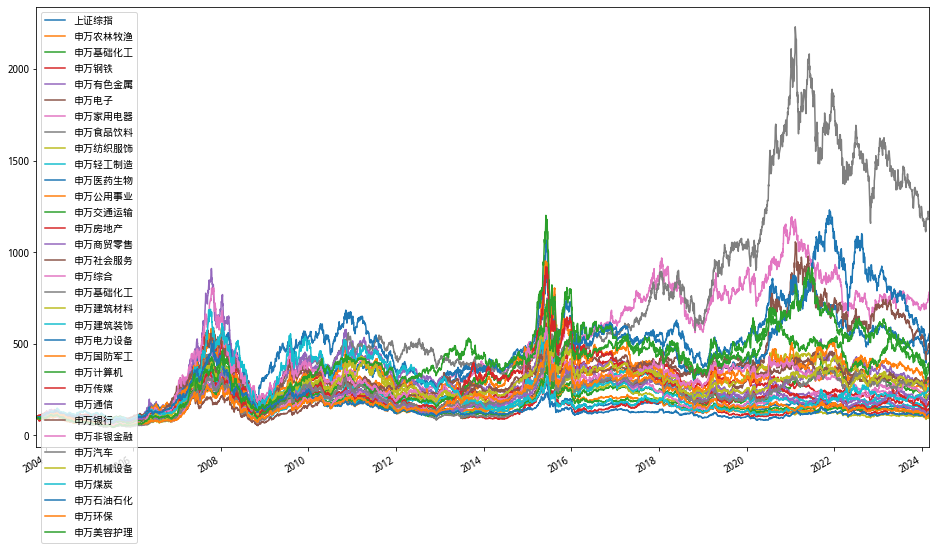

In [90]:
((1 + index_retx_df).cumprod()*100).plot()

In [91]:
industry_id_name_list = list(industry_id_name.values())

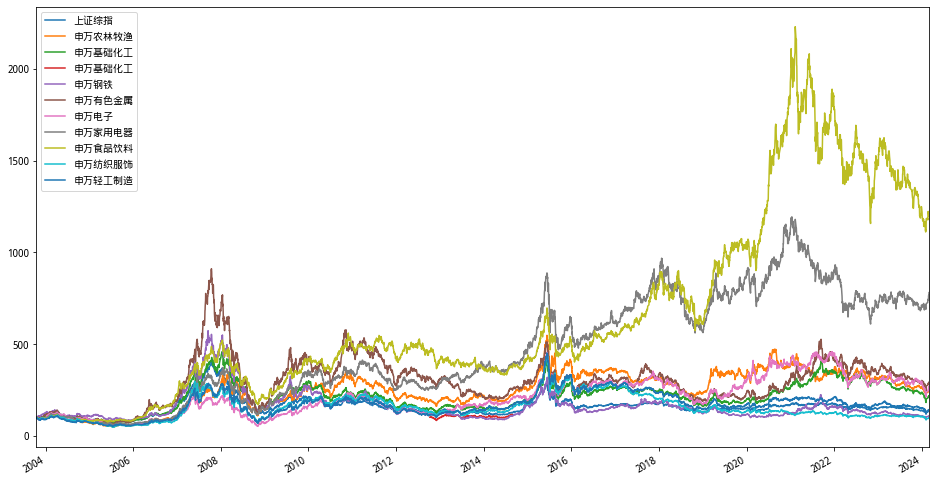

In [92]:
((1 + index_retx_df.loc[:,industry_id_name_list[0:10]]).cumprod()*100).plot()

食品饮料，家用电器

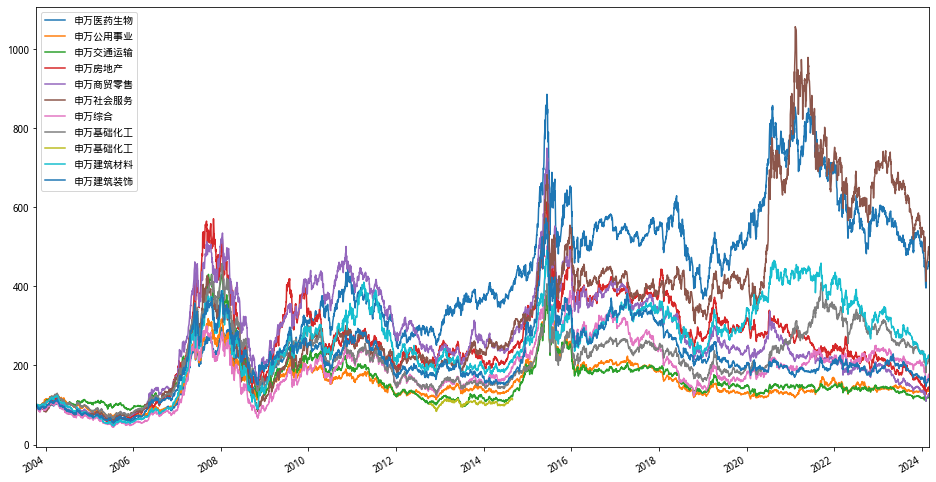

In [93]:
((1 + index_retx_df.loc[:,industry_id_name_list[10:20]]).cumprod()*100).plot()

社会服务，医药生物

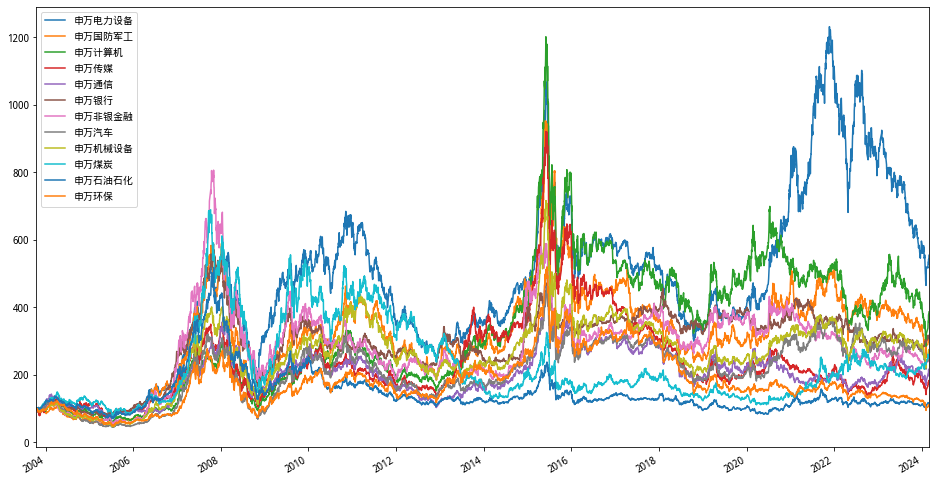

In [94]:
((1 + index_retx_df.loc[:,industry_id_name_list[20:32]]).cumprod()*100).plot()

电力设备

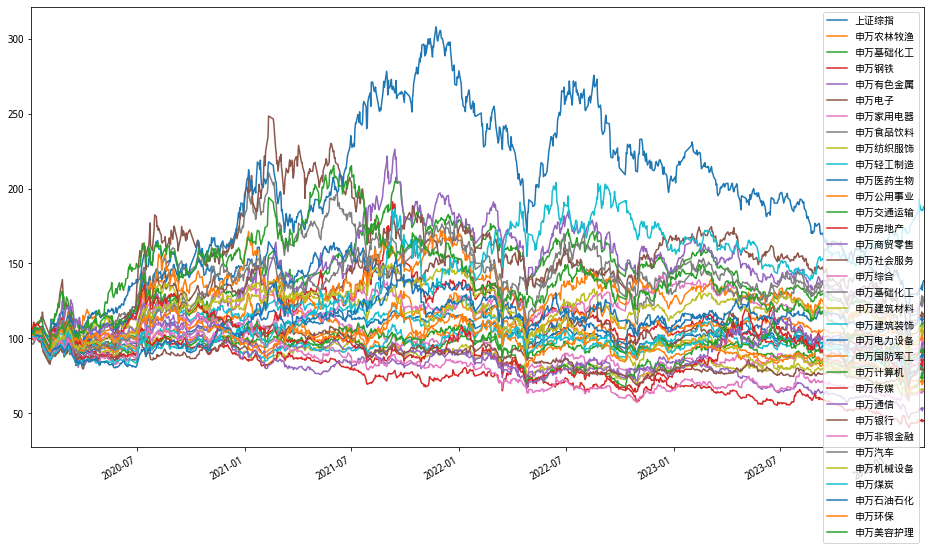

In [95]:
((1 + index_retx_df['2020':'2024']).cumprod()*100).plot()

#### 食品饮料, 家用电器，社会服务，医药生物，电力设备

In [96]:
cols = ['上证综指','申万食品饮料','申万家用电器','申万社会服务','申万医药生物','申万电力设备']

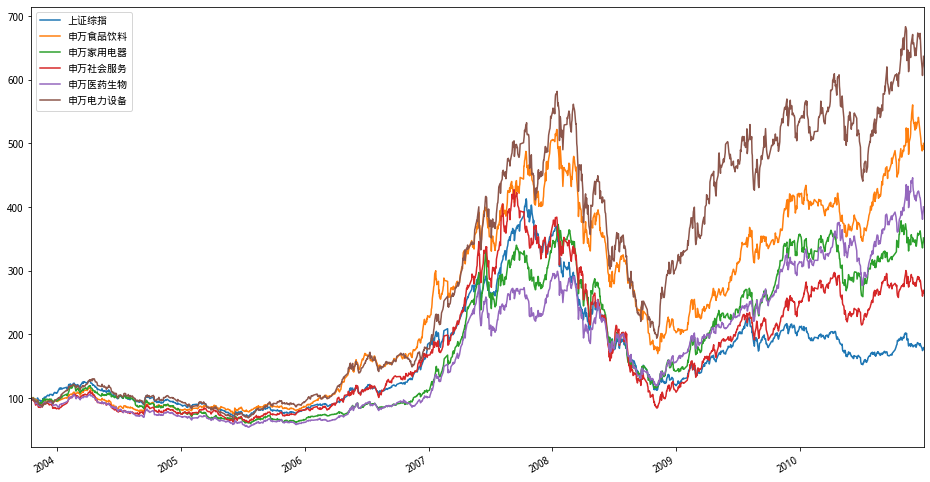

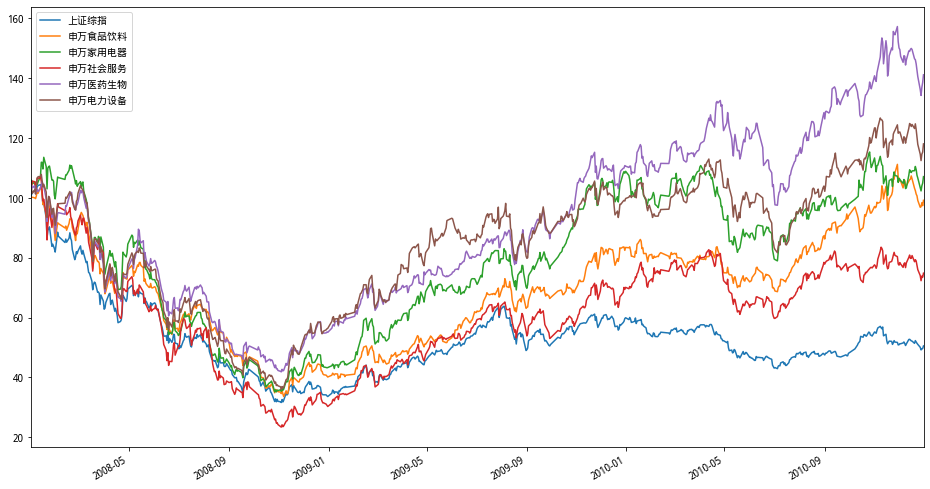

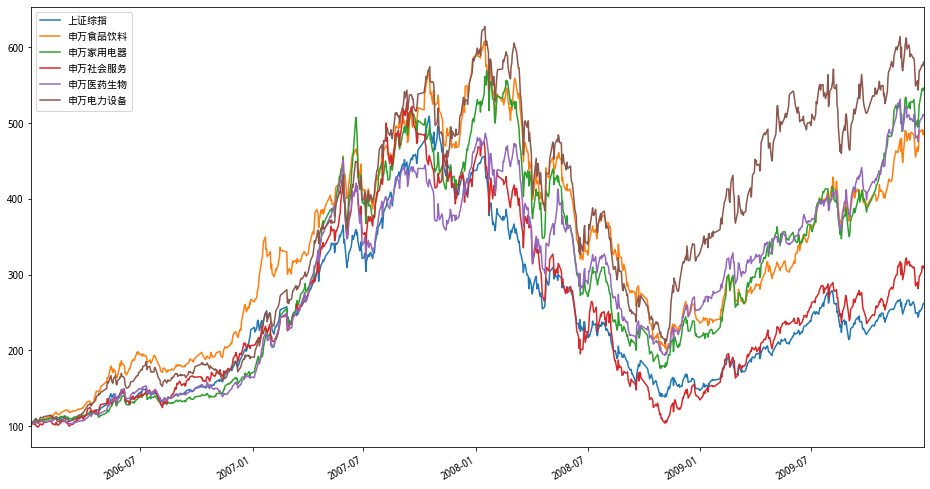

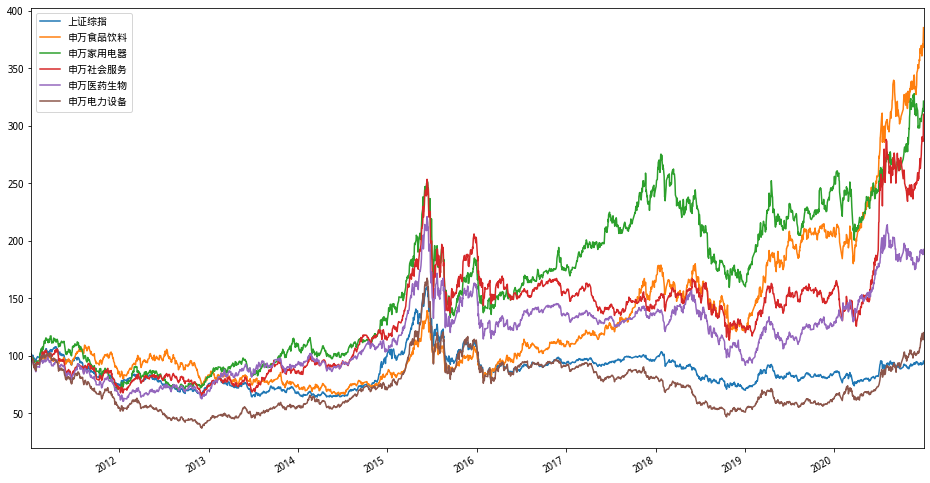

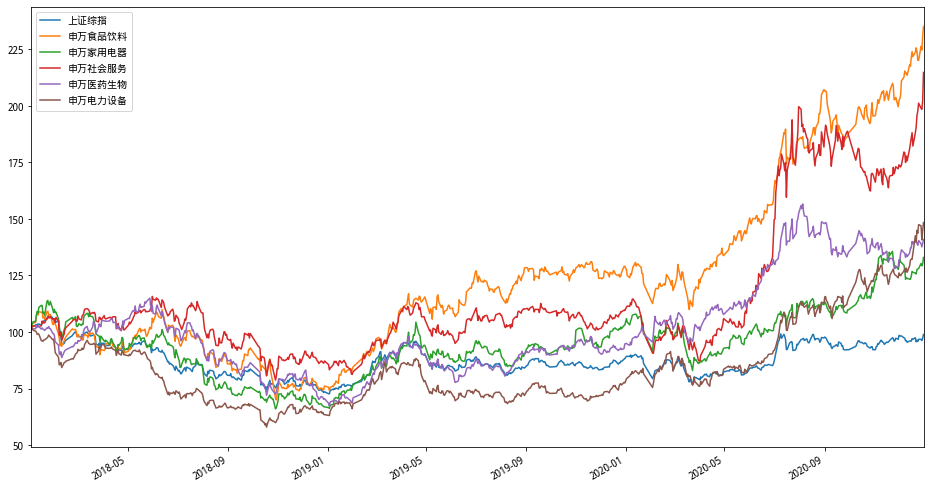

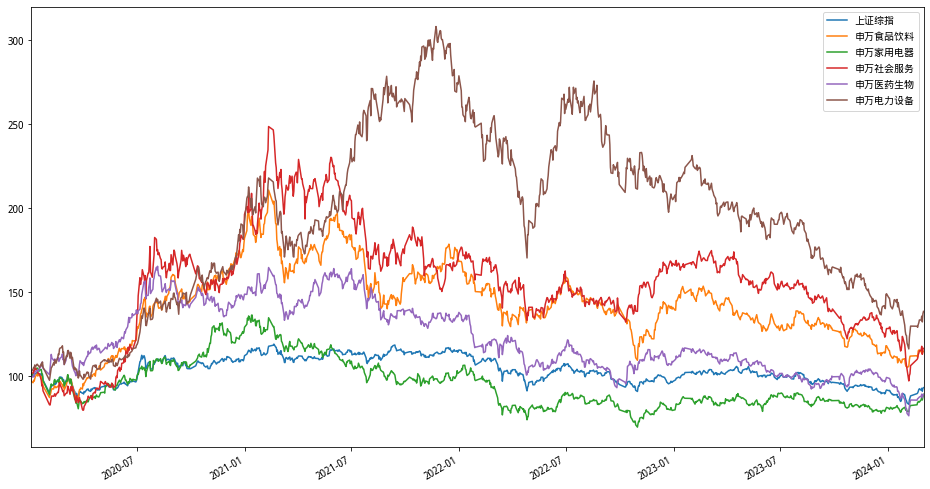

In [97]:
((1 + index_retx_df.loc['2003':'2010',cols]).cumprod()*100).plot()

((1 + index_retx_df.loc['2008':'2010',cols]).cumprod()*100).plot()

((1 + index_retx_df.loc['2006':'2009',cols]).cumprod()*100).plot()

((1 + index_retx_df.loc['2011':'2020',cols]).cumprod()*100).plot()

((1 + index_retx_df.loc['2018':'2020',cols]).cumprod()*100).plot()

((1 + index_retx_df.loc['2020':'2024',cols]).cumprod()*100).plot()

# Individual Stocks

观察以下几个指标：
- 股票数目
- 市值
- 成交额
- 换手率

按照以下几种分组：
- 沪深两市
- 板块
- 市值

In [98]:
# %%time
# # Need about 5 mins to read. Data size is about 490 MB.
# stk_df = DataAPI.MktEqudAdjAfGet(secID=stk_id,beginDate="20160101",endDate="20241231",isOpen=1,
#                                            field=["secID","secShortName","exchangeCD","tradeDate",
#                                                   "preClosePrice","closePrice","turnoverVol",
#                                                   "turnoverValue","dealAmount","turnoverRate",
#                                                   "negMarketValue","marketValue"],pandas="1")

CPU times: user 24.1 s, sys: 2.51 s, total: 26.6 s
Wall time: 5min 8s


In [99]:
# stk_df.to_pickle('./data/stk_df.pkl')

In [100]:
stk_df = pd.read_pickle('./data/stk_df.pkl')

In [101]:
stk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5420125 entries, 0 to 5420124
Data columns (total 12 columns):
secID             object
secShortName      object
exchangeCD        object
tradeDate         object
preClosePrice     float64
closePrice        float64
turnoverVol       int64
turnoverValue     float64
dealAmount        float64
turnoverRate      float64
negMarketValue    float64
marketValue       float64
dtypes: float64(7), int64(1), object(4)
memory usage: 496.2+ MB


In [97]:
# stk_df.loc[(stk_df['tradeDate']>='2022-01-01') & (stk_df['tradeDate']<='2023-03-01')].to_pickle('./data/stk_df_22_23.pkl') # for exercise 1

In [102]:
stk_df.head()

secID secShortName exchangeCD   tradeDate  preClosePrice  closePrice  \
0  000001.XSHE         平安银行       XSHE  2016-01-04       1184.928    1119.702   
1  000001.XSHE         平安银行       XSHE  2016-01-05       1119.702    1126.620   
2  000001.XSHE         平安银行       XSHE  2016-01-06       1126.620    1139.467   
3  000001.XSHE         平安银行       XSHE  2016-01-07       1139.467    1081.160   
4  000001.XSHE         平安银行       XSHE  2016-01-08       1081.160    1098.949   

   turnoverVol  turnoverValue  dealAmount  turnoverRate  negMarketValue  \
0       815247   6.603762e+08     24835.0        0.0048    1.337399e+11   
1       959593   7.555314e+08     29217.0        0.0056    1.345662e+11   
2       746104   5.916985e+08     20359.0        0.0044    1.361007e+11   
3       252837   1.948695e+08      6596.0        0.0015    1.291364e+11   
4      1081494   8.313345e+08     29002.0        0.0063    1.312611e+11   

    marketValue  
0  1.621173e+11  
1  1.631189e+11  
2  1.649790e+11  
3  1.565369e+11  
4  1.591125e+11

In [103]:
sec_sector = DataAPI.EquGet(secID=stk_id,field=["secID","ListSector"],pandas="1")

In [104]:
# industry = DataAPI.EquIndustryGet(secID=stk_id,industryVersionCD="010303",field=['secID','industryName1',''],pandas="1")

# industry['industryName1'].unique()

# industry.drop_duplicates()

In [105]:
stk_df = pd.merge(stk_df, sec_sector, on="secID")

In [106]:
stk_df

secID secShortName exchangeCD   tradeDate  preClosePrice  \
0        000001.XSHE         平安银行       XSHE  2016-01-04       1184.928   
1        000001.XSHE         平安银行       XSHE  2016-01-05       1119.702   
2        000001.XSHE         平安银行       XSHE  2016-01-06       1126.620   
3        000001.XSHE         平安银行       XSHE  2016-01-07       1139.467   
4        000001.XSHE         平安银行       XSHE  2016-01-08       1081.160   
5        000001.XSHE         平安银行       XSHE  2016-01-11       1098.949   
6        000001.XSHE         平安银行       XSHE  2016-01-12       1063.371   
7        000001.XSHE         平安银行       XSHE  2016-01-13       1068.312   
8        000001.XSHE         平安银行       XSHE  2016-01-14       1058.430   
9        000001.XSHE         平安银行       XSHE  2016-01-15       1064.359   
10       000001.XSHE         平安银行       XSHE  2016-01-18       1033.723   
11       000001.XSHE         平安银行       XSHE  2016-01-19       1028.782   
12       000001.XSHE         平安银行       XSHE  2016-01-20       1058.430   
13       000001.XSHE         平安银行       XSHE  2016-01-21       1041.629   
14       000001.XSHE         平安银行       XSHE  2016-01-22       1019.888   
15       000001.XSHE         平安银行       XSHE  2016-01-25       1027.794   
16       000001.XSHE         平安银行       XSHE  2016-01-26       1024.829   
17       000001.XSHE         平安银行       XSHE  2016-01-27        975.416   
18       000001.XSHE         平安银行       XSHE  2016-01-28        976.404   
19       000001.XSHE         平安银行       XSHE  2016-01-29        957.627   
20       000001.XSHE         平安银行       XSHE  2016-02-01        988.263   
21       000001.XSHE         平安银行       XSHE  2016-02-02        968.498   
22       000001.XSHE         平安银行       XSHE  2016-02-03        983.322   
23       000001.XSHE         平安银行       XSHE  2016-02-04        973.439   
24       000001.XSHE         平安银行       XSHE  2016-02-05        983.322   
25       000001.XSHE         平安银行       XSHE  2016-02-15        980.357   
26       000001.XSHE         平安银行       XSHE  2016-02-16        967.510   
27       000001.XSHE         平安银行       XSHE  2016-02-17        989.251   
28       000001.XSHE         平安银行       XSHE  2016-02-18       1003.087   
29       000001.XSHE         平安银行       XSHE  2016-02-19        997.158   
...              ...          ...        ...         ...            ...   
5420095  900957.XSHG         凌云B股       XSHG  2024-01-26          0.428   
5420096  900957.XSHG         凌云B股       XSHG  2024-01-29          0.431   
5420097  900957.XSHG         凌云B股       XSHG  2024-01-30          0.417   
5420098  900957.XSHG         凌云B股       XSHG  2024-01-31          0.414   
5420099  900957.XSHG         凌云B股       XSHG  2024-02-01          0.415   
5420100  900957.XSHG         凌云B股       XSHG  2024-02-02          0.418   
5420101  900957.XSHG         凌云B股       XSHG  2024-02-05          0.413   
5420102  900957.XSHG         凌云B股       XSHG  2024-02-06          0.393   
5420103  900957.XSHG         凌云B股       XSHG  2024-02-07          0.412   
5420104  900957.XSHG         凌云B股       XSHG  2024-02-08          0.414   
5420105  900957.XSHG         凌云B股       XSHG  2024-02-19          0.417   
5420106  900957.XSHG         凌云B股       XSHG  2024-02-20          0.418   
5420107  900957.XSHG         凌云B股       XSHG  2024-02-21          0.414   
5420108  900957.XSHG         凌云B股       XSHG  2024-02-22          0.448   
5420109  900957.XSHG         凌云B股       XSHG  2024-02-23          0.438   
5420110  900957.XSHG         凌云B股       XSHG  2024-02-26          0.441   
5420111  900957.XSHG         凌云B股       XSHG  2024-02-27          0.445   
5420112  900957.XSHG         凌云B股       XSHG  2024-02-28          0.452   
5420113  900957.XSHG         凌云B股       XSHG  2024-02-29          0.437   
5420114  900957.XSHG         凌云B股       XSHG  2024-03-01          0.449   
5420115  900957.XSHG         凌云B股       XSHG  2024-03-04          0.446   
5420116  900957.XSHG         凌云B股       

In [107]:
stk_df['tradeDate'] = pd.to_datetime(stk_df['tradeDate'], format='%Y-%m-%d')

In [108]:
stk_df.set_index(['secID','tradeDate'],inplace=True)

In [109]:
stk_df['yearMonth'] = stk_df.index.get_level_values(1).to_period('M') # Change to Month

In [110]:
q33 = stk_df.groupby(['yearMonth'])['negMarketValue'].quantile(0.33)
q67 = stk_df.groupby(['yearMonth'])['negMarketValue'].quantile(0.67)

In [111]:
q33.name = 'negMarketValue_q33'
q67.name = 'negMarketValue_q67'

In [112]:
stk_df.reset_index(inplace=True)

In [113]:
stk_df = pd.merge(stk_df,q33,on='yearMonth')
stk_df = pd.merge(stk_df,q67,on='yearMonth')

In [114]:
stk_df

secID  tradeDate secShortName exchangeCD  preClosePrice  \
0        000001.XSHE 2016-01-04         平安银行       XSHE       1184.928   
1        000001.XSHE 2016-01-05         平安银行       XSHE       1119.702   
2        000001.XSHE 2016-01-06         平安银行       XSHE       1126.620   
3        000001.XSHE 2016-01-07         平安银行       XSHE       1139.467   
4        000001.XSHE 2016-01-08         平安银行       XSHE       1081.160   
5        000001.XSHE 2016-01-11         平安银行       XSHE       1098.949   
6        000001.XSHE 2016-01-12         平安银行       XSHE       1063.371   
7        000001.XSHE 2016-01-13         平安银行       XSHE       1068.312   
8        000001.XSHE 2016-01-14         平安银行       XSHE       1058.430   
9        000001.XSHE 2016-01-15         平安银行       XSHE       1064.359   
10       000001.XSHE 2016-01-18         平安银行       XSHE       1033.723   
11       000001.XSHE 2016-01-19         平安银行       XSHE       1028.782   
12       000001.XSHE 2016-01-20         平安银行       XSHE       1058.430   
13       000001.XSHE 2016-01-21         平安银行       XSHE       1041.629   
14       000001.XSHE 2016-01-22         平安银行       XSHE       1019.888   
15       000001.XSHE 2016-01-25         平安银行       XSHE       1027.794   
16       000001.XSHE 2016-01-26         平安银行       XSHE       1024.829   
17       000001.XSHE 2016-01-27         平安银行       XSHE        975.416   
18       000001.XSHE 2016-01-28         平安银行       XSHE        976.404   
19       000001.XSHE 2016-01-29         平安银行       XSHE        957.627   
20       000004.XSHE 2016-01-04         国华网安       XSHE        313.678   
21       000004.XSHE 2016-01-05         国华网安       XSHE        282.310   
22       000004.XSHE 2016-01-06         国华网安       XSHE        264.337   
23       000004.XSHE 2016-01-07         国华网安       XSHE        267.754   
24       000004.XSHE 2016-01-08         国华网安       XSHE        240.965   
25       000004.XSHE 2016-01-11         国华网安       XSHE        242.468   
26       000004.XSHE 2016-01-12         国华网安       XSHE        218.208   
27       000004.XSHE 2016-01-13         国华网安       XSHE        215.679   
28       000004.XSHE 2016-01-14         国华网安       XSHE        205.428   
29       000004.XSHE 2016-01-15         国华网安       XSHE        213.629   
...              ...        ...          ...        ...            ...   
5420095  900952.XSHG 2024-03-06         锦港B股       XSHG          0.405   
5420096  900952.XSHG 2024-03-07         锦港B股       XSHG          0.407   
5420097  900952.XSHG 2024-03-08         锦港B股       XSHG          0.410   
5420098  900952.XSHG 2024-03-11         锦港B股       XSHG          0.407   
5420099  900952.XSHG 2024-03-12         锦港B股       XSHG          0.410   
5420100  900952.XSHG 2024-03-13         锦港B股       XSHG          0.410   
5420101  900952.XSHG 2024-03-14         锦港B股       XSHG          0.410   
5420102  900952.XSHG 2024-03-15         锦港B股       XSHG          0.417   
5420103  900953.XSHG 2024-03-01          凯马B       XSHG          0.326   
5420104  900953.XSHG 2024-03-04          凯马B       XSHG          0.323   
5420105  900953.XSHG 2024-03-05          凯马B       XSHG          0.318   
5420106  900953.XSHG 2024-03-06          凯马B       XSHG          0.320   
5420107  900953.XSHG 2024-03-07          凯马B       XSHG          0.320   
5420108  900953.XSHG 2024-03-08          凯马B       XSHG          0.313   
5420109  900953.XSHG 2024-03-11          凯马B       XSHG          0.311   
5420110  900953.XSHG 2024-03-12          凯马B       XSHG          0.307   
5420111  900953.XSHG 2024-03-13          凯马B       XSHG          0.309   
5420112  900953.XSHG 2024-03-14          凯马B       XSHG          0.308   
5420113  900953.XSHG 2024-03-15          凯马B       XSHG          0.304   
5420114  900957.XSHG 2024-03-01         凌云B股       XSHG          0.449   
5420115  900957.XSHG 2024-03-04         凌云B股       XSHG          0.446   
5420116  900957.XSHG 2024-03-05         凌云B股       XSHG          0.445   
5420117  900957.XSH

In [115]:
stk_df['size'] = 'small'

stk_df.loc[(stk_df['negMarketValue'] > stk_df['negMarketValue_q33']) & (stk_df['negMarketValue'] <= stk_df['negMarketValue_q67']), 'size'] = 'medium'

stk_df.loc[stk_df['negMarketValue'] > stk_df['negMarketValue_q67'], 'size'] = 'large'

In [116]:
stk_df.head()

secID  tradeDate secShortName exchangeCD  preClosePrice  closePrice  \
0  000001.XSHE 2016-01-04         平安银行       XSHE       1184.928    1119.702   
1  000001.XSHE 2016-01-05         平安银行       XSHE       1119.702    1126.620   
2  000001.XSHE 2016-01-06         平安银行       XSHE       1126.620    1139.467   
3  000001.XSHE 2016-01-07         平安银行       XSHE       1139.467    1081.160   
4  000001.XSHE 2016-01-08         平安银行       XSHE       1081.160    1098.949   

   turnoverVol  turnoverValue  dealAmount  turnoverRate  negMarketValue  \
0       815247   6.603762e+08     24835.0        0.0048    1.337399e+11   
1       959593   7.555314e+08     29217.0        0.0056    1.345662e+11   
2       746104   5.916985e+08     20359.0        0.0044    1.361007e+11   
3       252837   1.948695e+08      6596.0        0.0015    1.291364e+11   
4      1081494   8.313345e+08     29002.0        0.0063    1.312611e+11   

    marketValue ListSector yearMonth  negMarketValue_q33  negMarketValue_q67  \
0  1.621173e+11         主板   2016-01        3.731235e+09        7.918557e+09   
1  1.631189e+11         主板   2016-01        3.731235e+09        7.918557e+09   
2  1.649790e+11         主板   2016-01        3.731235e+09        7.918557e+09   
3  1.565369e+11         主板   2016-01        3.731235e+09        7.918557e+09   
4  1.591125e+11         主板   2016-01        3.731235e+09        7.918557e+09   

    size  
0  large  
1  large  
2  large  
3  large  
4  large

## 股票数目

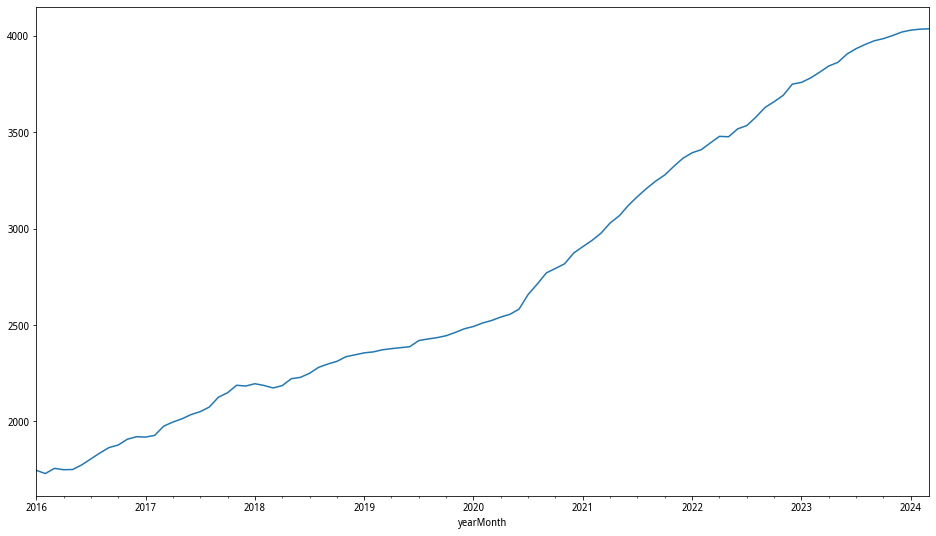

In [117]:
stk_df.groupby('yearMonth')['secShortName'].nunique().plot()

In [118]:
n_stk_by_list = stk_df.groupby(['ListSector','yearMonth'])['secShortName'].nunique().reset_index().pivot(index='yearMonth',columns='ListSector',values='secShortName')

In [119]:
n_stk_by_list

ListSector      主板     创业板    北交所    科创板
yearMonth                               
2016-01     1503.0   243.0    NaN    NaN
2016-02     1490.0   239.0    NaN    NaN
2016-03     1508.0   248.0    NaN    NaN
2016-04     1504.0   245.0    NaN    NaN
2016-05     1501.0   249.0    NaN    NaN
2016-06     1516.0   258.0    NaN    NaN
2016-07     1545.0   260.0    NaN    NaN
2016-08     1562.0   274.0    NaN    NaN
2016-09     1576.0   288.0    NaN    NaN
2016-10     1583.0   294.0    NaN    NaN
2016-11     1602.0   305.0    NaN    NaN
2016-12     1613.0   307.0    NaN    NaN
2017-01     1615.0   303.0    NaN    NaN
2017-02     1612.0   315.0    NaN    NaN
2017-03     1646.0   329.0    NaN    NaN
2017-04     1659.0   337.0    NaN    NaN
2017-05     1668.0   345.0    NaN    NaN
2017-06     1681.0   354.0    NaN    NaN
2017-07     1694.0   356.0    NaN    NaN
2017-08     1717.0   357.0    NaN    NaN
2017-09     1761.0   364.0    NaN    NaN
2017-10     1777.0   371.0    NaN    NaN
2017-11     1802.0   385.0    NaN    NaN
2017-12     1798.0   385.0    NaN    NaN
2018-01     1804.0   391.0    NaN    NaN
2018-02     1793.0   393.0    NaN    NaN
2018-03     1783.0   390.0    NaN    NaN
2018-04     1791.0   394.0    NaN    NaN
2018-05     1811.0   410.0    NaN    NaN
2018-06     1819.0   409.0    NaN    NaN
...            ...     ...    ...    ...
2021-10     2145.0   713.0   68.0  352.0
2021-11     2151.0   729.0   81.0  362.0
2021-12     2157.0   752.0   79.0  377.0
2022-01     2160.0   765.0   81.0  387.0
2022-02     2164.0   771.0   83.0  391.0
2022-03     2167.0   787.0   86.0  404.0
2022-04     2168.0   803.0   87.0  420.0
2022-05     2158.0   803.0   91.0  424.0
2022-06     2169.0   819.0   98.0  431.0
2022-07     2164.0   824.0  104.0  442.0
2022-08     2170.0   844.0  106.0  459.0
2022-09     2178.0   864.0  114.0  473.0
2022-10     2184.0   871.0  121.0  483.0
2022-11     2187.0   887.0  130.0  488.0
2022-12     2191.0   896.0  162.0  501.0
2023-01     2193.0   896.0  166.0  504.0
2023-02     2199.0   901.0  175.0  507.0
2023-03     2208.0   910.0  184.0  510.0
2023-04     2216.0   918.0  191.0  519.0
2023-05     2211.0   928.0  198.0  526.0
2023-06     2215.0   945.0  204.0  542.0
2023-07     2208.0   966.0  210.0  550.0
2023-08     2203.0   980.0  216.0  557.0
2023-09     2204.0   988.0  222.0  561.0
2023-10     2207.0   992.0  225.0  562.0
2023-11     2211.0   993.0  233.0  565.0
2023-12     2215.0  1000.0  239.0  566.0
2024-01     2218.0  1002.0  243.0  567.0
2024-02     2217.0  1005.0  244.0  569.0
2024-03     2216.0  1006.0  245.0  570.0

[99 rows x 4 columns]

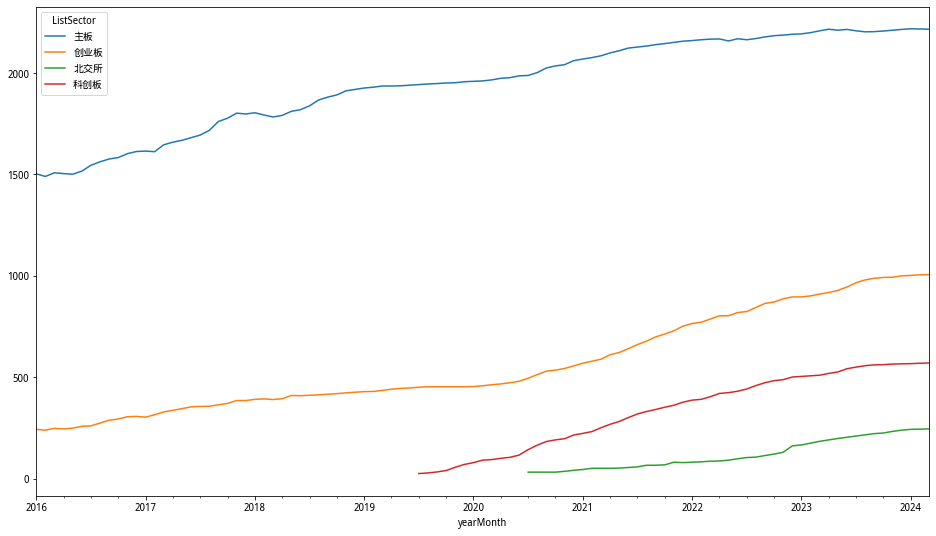

In [120]:
n_stk_by_list.plot()

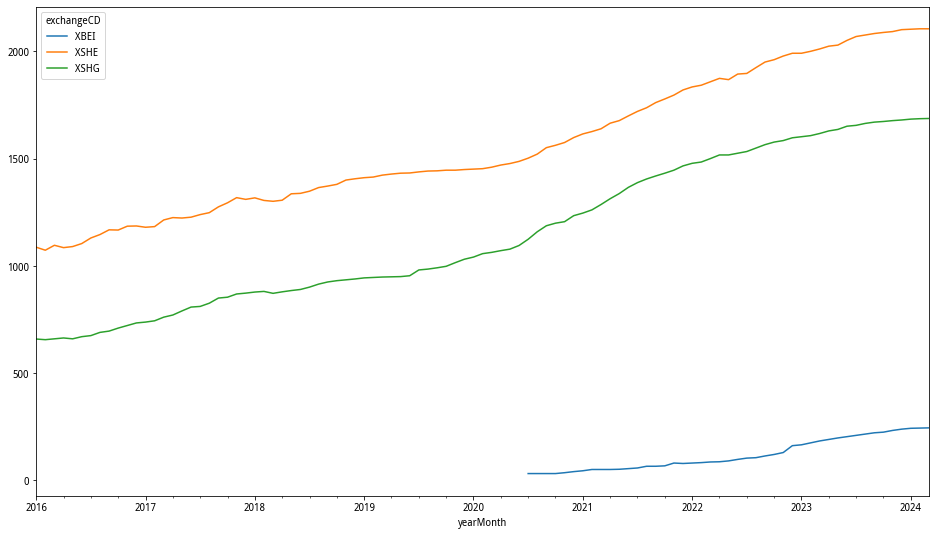

In [121]:
stk_df.groupby(['exchangeCD','yearMonth'])['secShortName'].nunique().reset_index().pivot(index='yearMonth',columns='exchangeCD',values='secShortName').plot()

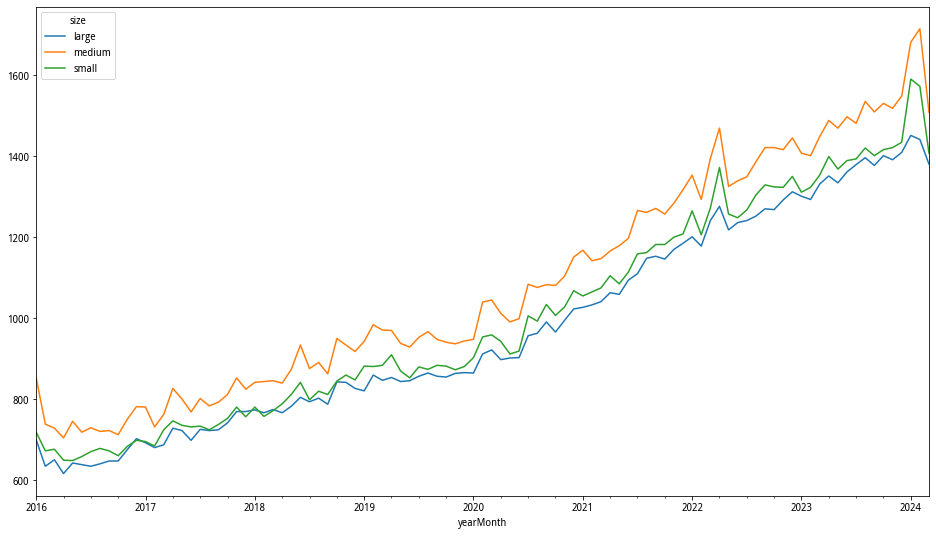

In [122]:
stk_df.groupby(['size','yearMonth'])['secShortName'].nunique().reset_index().pivot(index='yearMonth',columns='size',values='secShortName').plot()

## 总流通市值

In [123]:
stk_df.groupby(['yearMonth'])['negMarketValue'].sum()

yearMonth
2016-01    4.272677e+14
2016-02    3.206165e+14
2016-03    4.782268e+14
2016-04    4.431071e+14
2016-05    4.454225e+14
2016-06    4.424976e+14
2016-07    4.923575e+14
2016-08    5.519801e+14
2016-09    4.805470e+14
2016-10    3.956597e+14
2016-11    5.612879e+14
2016-12    5.520395e+14
2017-01    4.518832e+14
2017-02    4.614932e+14
2017-03    6.008731e+14
2017-04    4.625207e+14
2017-05    4.947731e+14
2017-06    5.607937e+14
2017-07    5.546283e+14
2017-08    6.239423e+14
2017-09    5.929370e+14
2017-10    4.904322e+14
2017-11    6.451162e+14
2017-12    6.000761e+14
2018-01    6.617467e+14
2018-02    4.201393e+14
2018-03    6.231907e+14
2018-04    4.973459e+14
2018-05    6.178945e+14
2018-06    5.301170e+14
               ...     
2021-10    7.765503e+14
2021-11    1.074839e+15
2021-12    1.164641e+15
2022-01    9.434940e+14
2022-02    7.765314e+14
2022-03    1.052397e+15
2022-04    8.242770e+14
2022-05    8.123195e+14
2022-06    9.722499e+14
2022-07    9.977907e+14
2022-0

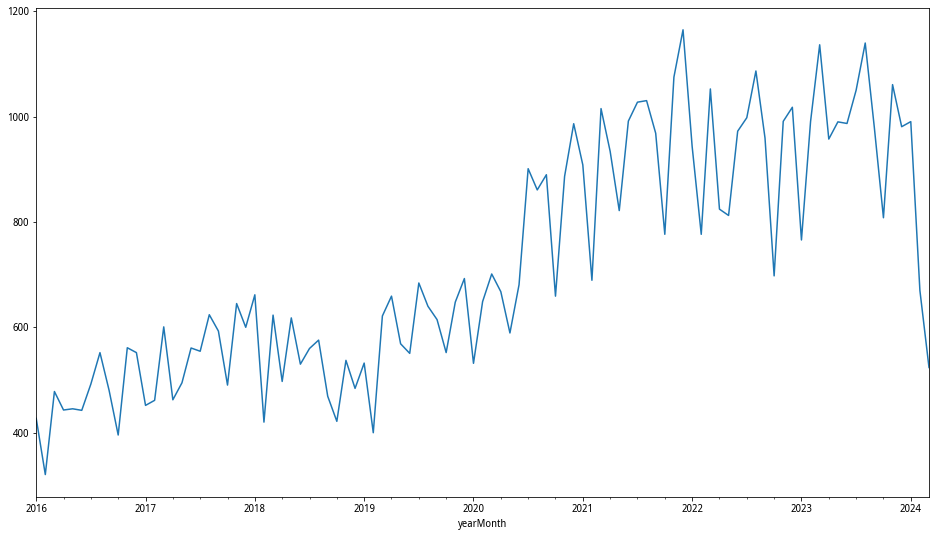

In [124]:
(stk_df.groupby(['yearMonth'])['negMarketValue'].sum() / 1e12).plot()

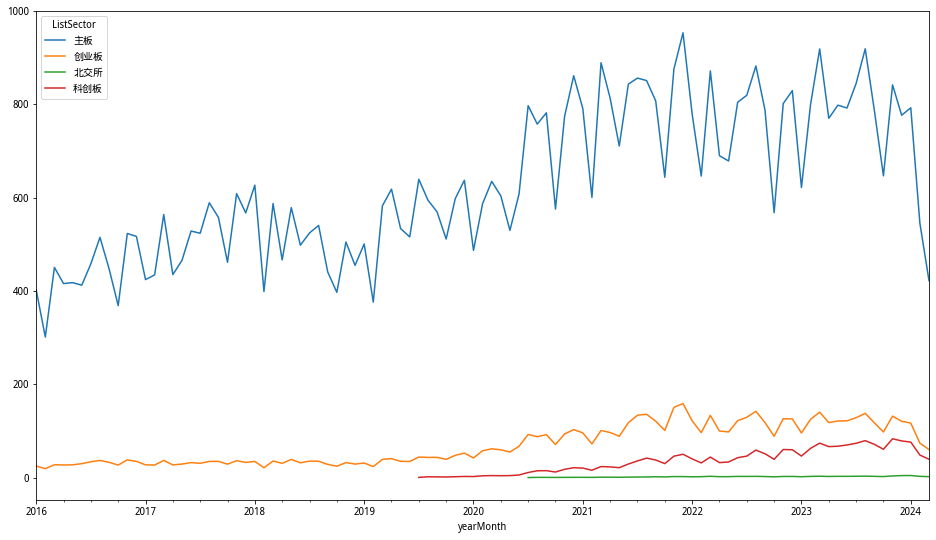

In [125]:
mkt_value_by_sector = stk_df.groupby(['ListSector','yearMonth'])['negMarketValue'].sum().reset_index().pivot(index='yearMonth',columns='ListSector',values='negMarketValue') / 1e12

mkt_value_by_sector.plot()

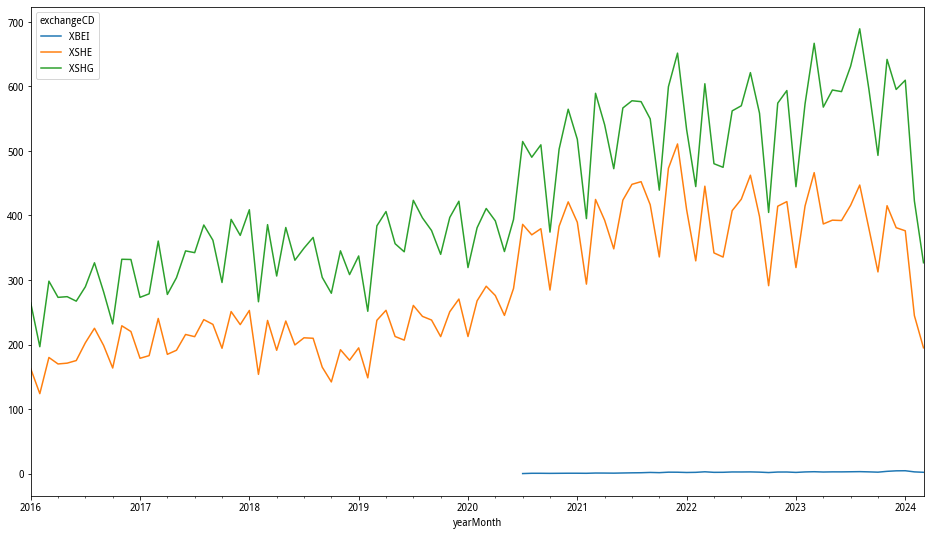

In [126]:
mkt_value_by_exch = stk_df.groupby(['exchangeCD','yearMonth'])['negMarketValue'].sum().reset_index().pivot(index='yearMonth',columns='exchangeCD',values='negMarketValue') / 1e12

mkt_value_by_exch.plot()

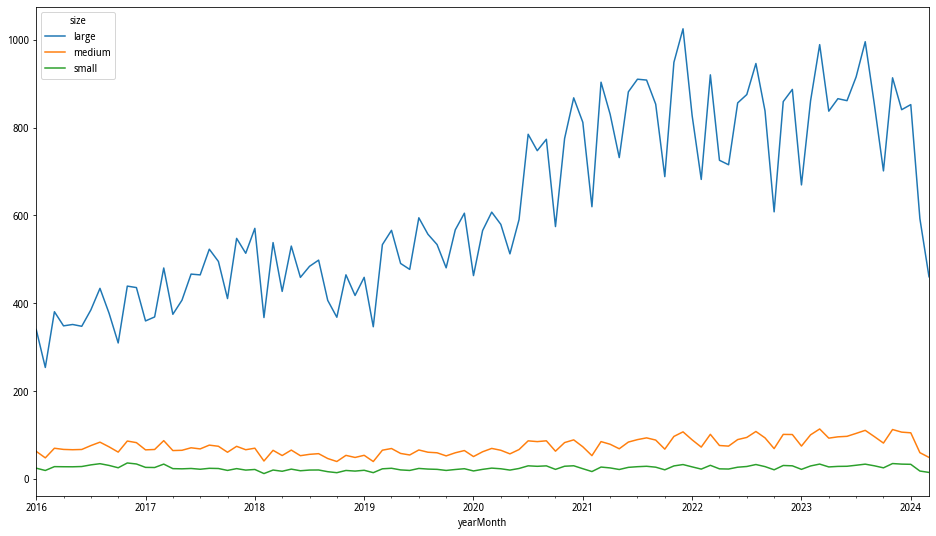

In [127]:
mkt_value_by_exch = stk_df.groupby(['size','yearMonth'])['negMarketValue'].sum().reset_index().pivot(index='yearMonth',columns='size',values='negMarketValue') / 1e12

mkt_value_by_exch.plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f385457b710>,
      dtype=object)

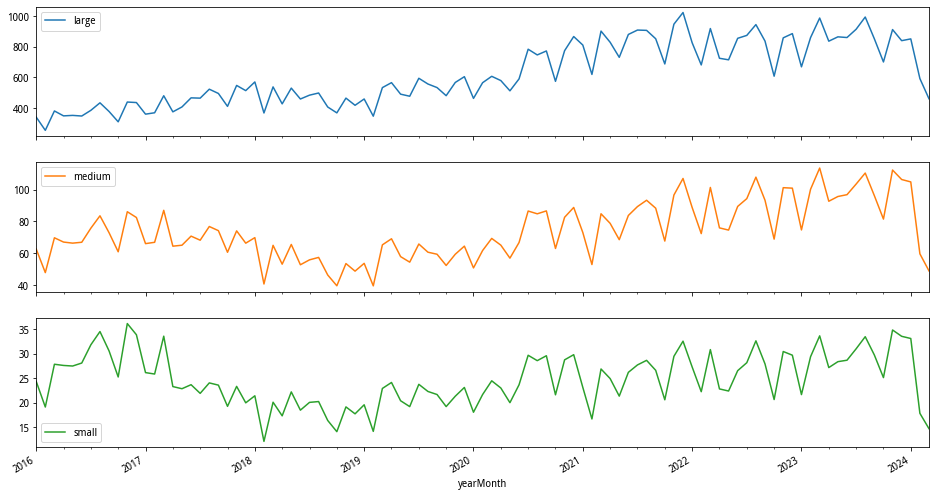

In [128]:
mkt_value_by_exch.plot(subplots=True)

## 总成交额

In [129]:
stk_df.groupby(['yearMonth'])['turnoverValue'].sum()

yearMonth
2016-01    6.746314e+12
2016-02    4.844192e+12
2016-03    8.292141e+12
2016-04    7.238898e+12
2016-05    5.725438e+12
2016-06    7.248399e+12
2016-07    8.123795e+12
2016-08    7.459994e+12
2016-09    5.375322e+12
2016-10    4.967615e+12
2016-11    8.867737e+12
2016-12    6.302507e+12
2017-01    4.163235e+12
2017-02    4.964552e+12
2017-03    7.216809e+12
2017-04    5.720815e+12
2017-05    5.104187e+12
2017-06    5.515080e+12
2017-07    6.445001e+12
2017-08    7.399817e+12
2017-09    7.252311e+12
2017-10    5.010625e+12
2017-11    7.207957e+12
2017-12    5.223532e+12
2018-01    7.599034e+12
2018-02    4.256757e+12
2018-03    6.447724e+12
2018-04    5.152005e+12
2018-05    5.763021e+12
2018-06    4.516481e+12
               ...     
2021-10    1.065749e+13
2021-11    1.637358e+13
2021-12    1.702104e+13
2022-01    1.338021e+13
2022-02    9.856054e+12
2022-03    1.537462e+13
2022-04    1.122121e+13
2022-05    1.080348e+13
2022-06    1.552037e+13
2022-07    1.421794e+13
2022-0

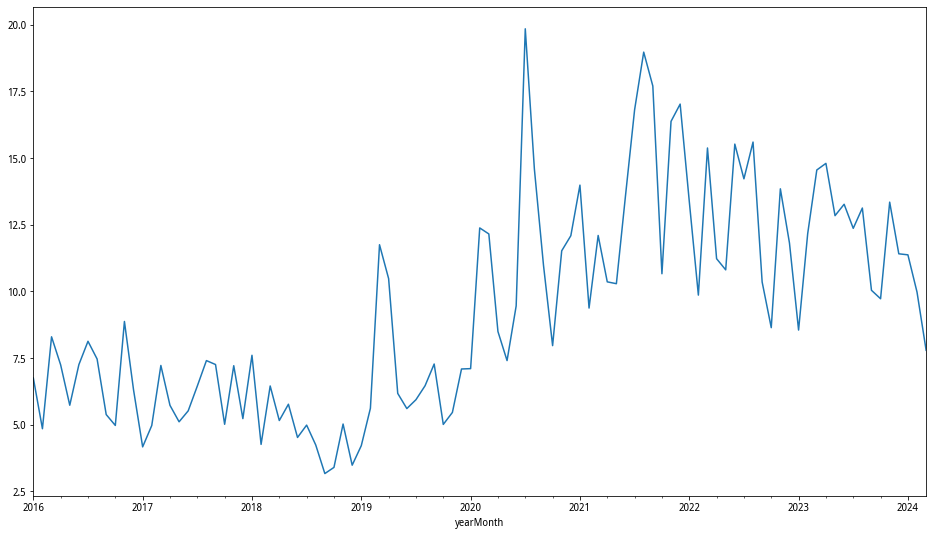

In [130]:
(stk_df.groupby(['yearMonth'])['turnoverValue'].sum() / 1e12).plot()

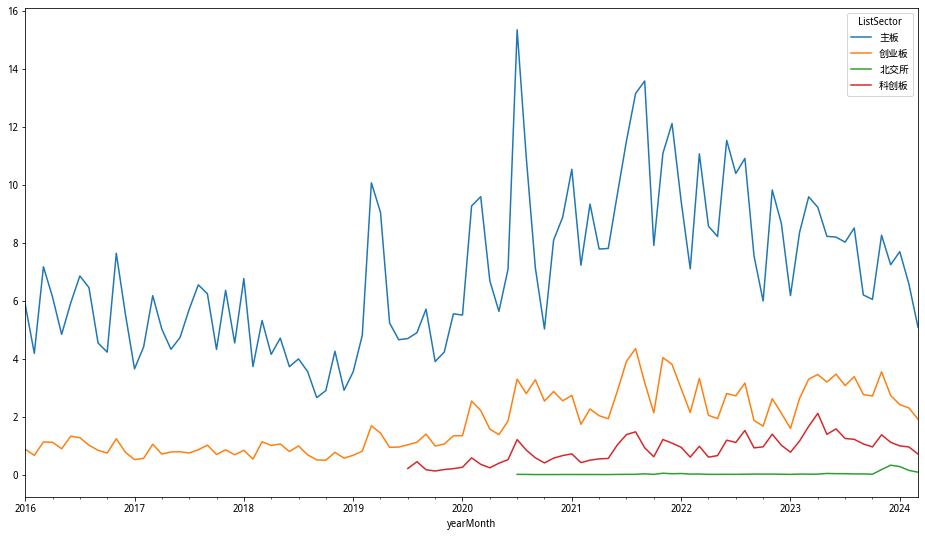

In [131]:
turnover_value_by_sector = stk_df.groupby(['ListSector','yearMonth'])['turnoverValue'].sum().reset_index().pivot(index='yearMonth',columns='ListSector',values='turnoverValue') / 1e12

turnover_value_by_sector.plot()

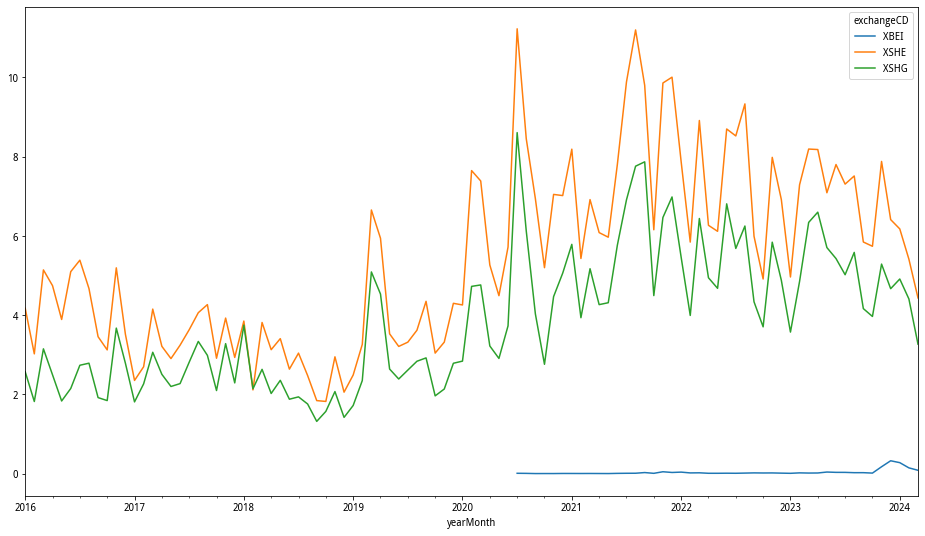

In [132]:
turnover_value_by_sector = stk_df.groupby(['exchangeCD','yearMonth'])['turnoverValue'].sum().reset_index().pivot(index='yearMonth',columns='exchangeCD',values='turnoverValue') / 1e12

turnover_value_by_sector.plot()

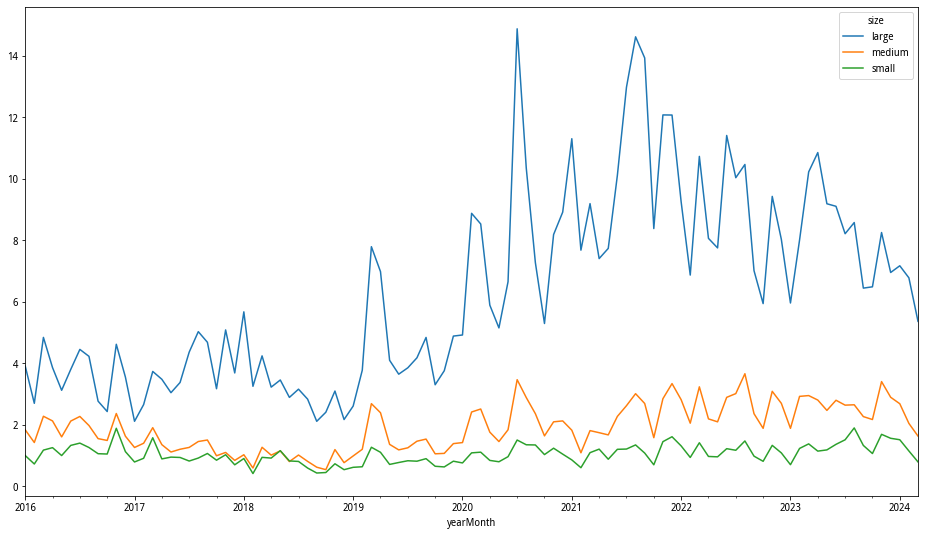

In [133]:
turnover_value_by_sector = stk_df.groupby(['size','yearMonth'])['turnoverValue'].sum().reset_index().pivot(index='yearMonth',columns='size',values='turnoverValue') / 1e12

turnover_value_by_sector.plot()

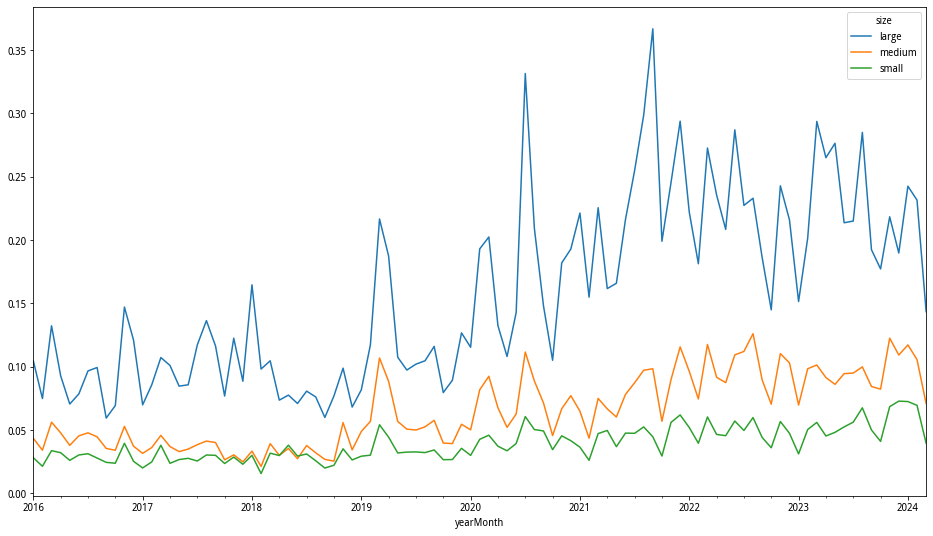

In [134]:
turnover_vol_by_sector = stk_df.groupby(['size','yearMonth'])['turnoverVol'].sum().reset_index().pivot(index='yearMonth',columns='size',values='turnoverVol') / 1e12

turnover_vol_by_sector.plot()

## 平均换手率

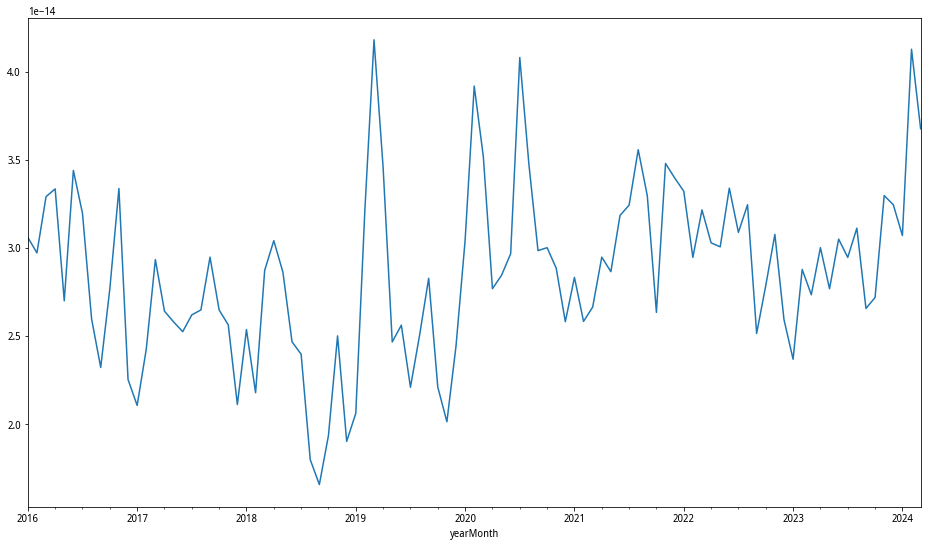

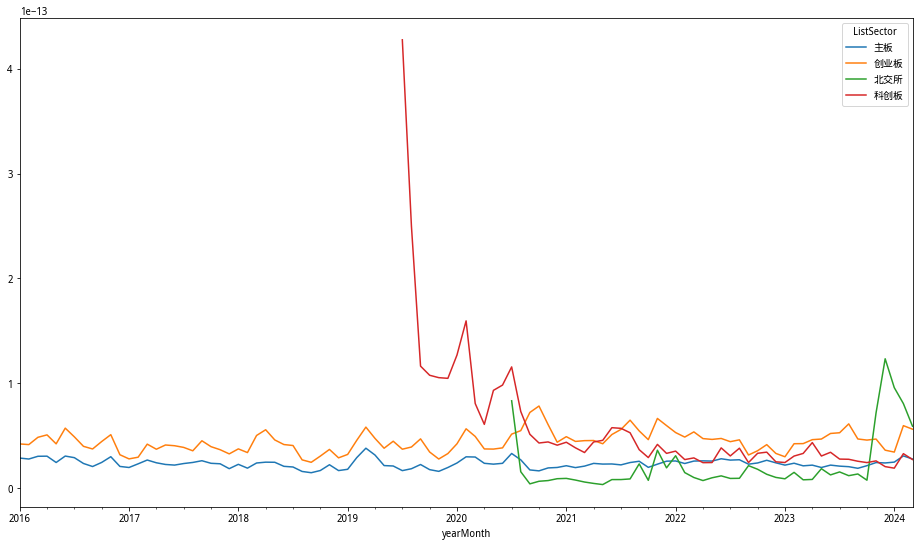

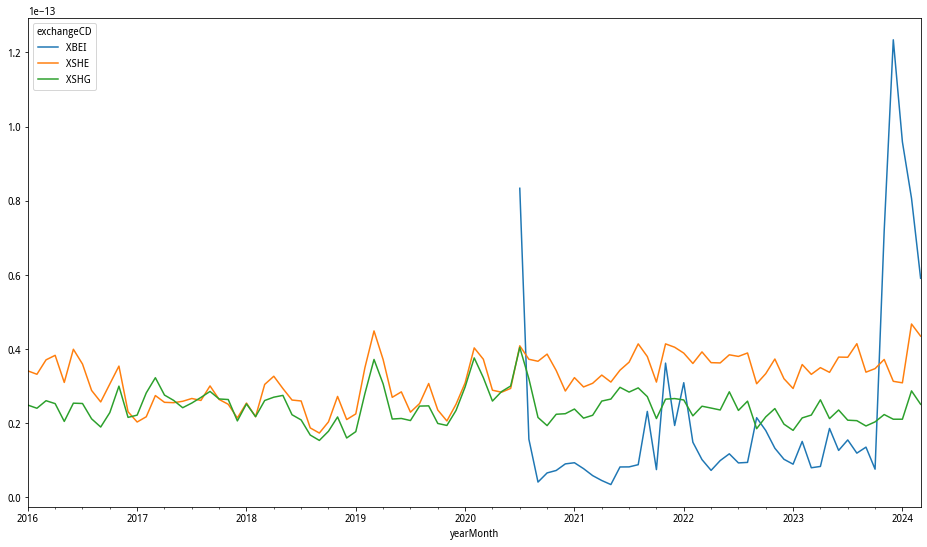

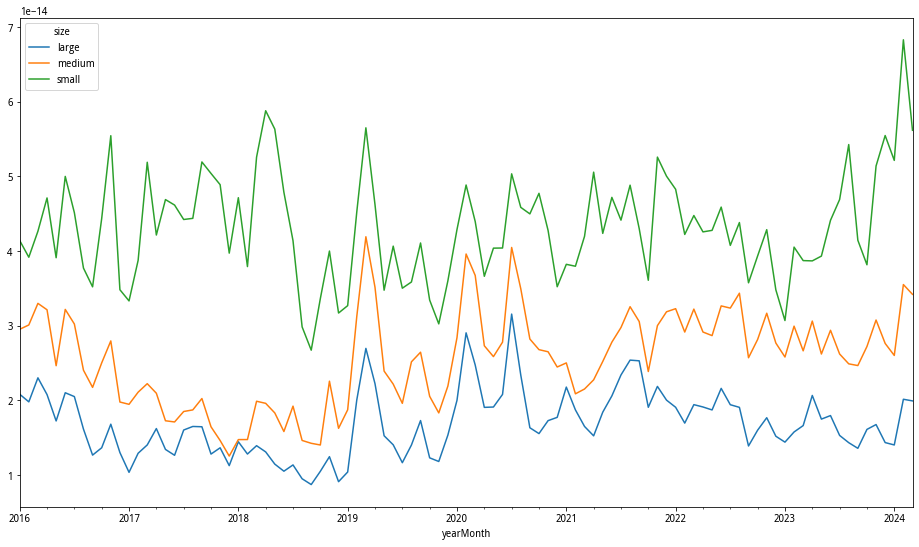

In [135]:
stk_df.groupby(['yearMonth'])['turnoverRate'].mean()

(stk_df.groupby(['yearMonth'])['turnoverRate'].mean() / 1e12).plot()

turnover_by_sector = stk_df.groupby(['ListSector','yearMonth'])['turnoverRate'].mean().reset_index().pivot(index='yearMonth',columns='ListSector',values='turnoverRate') / 1e12

turnover_by_sector.plot()

turnover_by_sector = stk_df.groupby(['exchangeCD','yearMonth'])['turnoverRate'].mean().reset_index().pivot(index='yearMonth',columns='exchangeCD',values='turnoverRate') / 1e12

turnover_by_sector.plot()

turnover_by_size = stk_df.groupby(['size','yearMonth'])['turnoverRate'].mean().reset_index().pivot(index='yearMonth',columns='size',values='turnoverRate') / 1e12

turnover_by_size.plot()

## 平均收益率

In [136]:
stk_df

secID  tradeDate secShortName exchangeCD  preClosePrice  \
0        000001.XSHE 2016-01-04         平安银行       XSHE       1184.928   
1        000001.XSHE 2016-01-05         平安银行       XSHE       1119.702   
2        000001.XSHE 2016-01-06         平安银行       XSHE       1126.620   
3        000001.XSHE 2016-01-07         平安银行       XSHE       1139.467   
4        000001.XSHE 2016-01-08         平安银行       XSHE       1081.160   
5        000001.XSHE 2016-01-11         平安银行       XSHE       1098.949   
6        000001.XSHE 2016-01-12         平安银行       XSHE       1063.371   
7        000001.XSHE 2016-01-13         平安银行       XSHE       1068.312   
8        000001.XSHE 2016-01-14         平安银行       XSHE       1058.430   
9        000001.XSHE 2016-01-15         平安银行       XSHE       1064.359   
10       000001.XSHE 2016-01-18         平安银行       XSHE       1033.723   
11       000001.XSHE 2016-01-19         平安银行       XSHE       1028.782   
12       000001.XSHE 2016-01-20         平安银行       XSHE       1058.430   
13       000001.XSHE 2016-01-21         平安银行       XSHE       1041.629   
14       000001.XSHE 2016-01-22         平安银行       XSHE       1019.888   
15       000001.XSHE 2016-01-25         平安银行       XSHE       1027.794   
16       000001.XSHE 2016-01-26         平安银行       XSHE       1024.829   
17       000001.XSHE 2016-01-27         平安银行       XSHE        975.416   
18       000001.XSHE 2016-01-28         平安银行       XSHE        976.404   
19       000001.XSHE 2016-01-29         平安银行       XSHE        957.627   
20       000004.XSHE 2016-01-04         国华网安       XSHE        313.678   
21       000004.XSHE 2016-01-05         国华网安       XSHE        282.310   
22       000004.XSHE 2016-01-06         国华网安       XSHE        264.337   
23       000004.XSHE 2016-01-07         国华网安       XSHE        267.754   
24       000004.XSHE 2016-01-08         国华网安       XSHE        240.965   
25       000004.XSHE 2016-01-11         国华网安       XSHE        242.468   
26       000004.XSHE 2016-01-12         国华网安       XSHE        218.208   
27       000004.XSHE 2016-01-13         国华网安       XSHE        215.679   
28       000004.XSHE 2016-01-14         国华网安       XSHE        205.428   
29       000004.XSHE 2016-01-15         国华网安       XSHE        213.629   
...              ...        ...          ...        ...            ...   
5420095  900952.XSHG 2024-03-06         锦港B股       XSHG          0.405   
5420096  900952.XSHG 2024-03-07         锦港B股       XSHG          0.407   
5420097  900952.XSHG 2024-03-08         锦港B股       XSHG          0.410   
5420098  900952.XSHG 2024-03-11         锦港B股       XSHG          0.407   
5420099  900952.XSHG 2024-03-12         锦港B股       XSHG          0.410   
5420100  900952.XSHG 2024-03-13         锦港B股       XSHG          0.410   
5420101  900952.XSHG 2024-03-14         锦港B股       XSHG          0.410   
5420102  900952.XSHG 2024-03-15         锦港B股       XSHG          0.417   
5420103  900953.XSHG 2024-03-01          凯马B       XSHG          0.326   
5420104  900953.XSHG 2024-03-04          凯马B       XSHG          0.323   
5420105  900953.XSHG 2024-03-05          凯马B       XSHG          0.318   
5420106  900953.XSHG 2024-03-06          凯马B       XSHG          0.320   
5420107  900953.XSHG 2024-03-07          凯马B       XSHG          0.320   
5420108  900953.XSHG 2024-03-08          凯马B       XSHG          0.313   
5420109  900953.XSHG 2024-03-11          凯马B       XSHG          0.311   
5420110  900953.XSHG 2024-03-12          凯马B       XSHG          0.307   
5420111  900953.XSHG 2024-03-13          凯马B       XSHG          0.309   
5420112  900953.XSHG 2024-03-14          凯马B       XSHG          0.308   
5420113  900953.XSHG 2024-03-15          凯马B       XSHG          0.304   
5420114  900957.XSHG 2024-03-01         凌云B股       XSHG          0.449   
5420115  900957.XSHG 2024-03-04         凌云B股       XSHG          0.446   
5420116  900957.XSHG 2024-03-05         凌云B股       XSHG          0.445   
5420117  900957.XSH

In [137]:
stk_df['ret'] = stk_df['closePrice'] / stk_df['preClosePrice'] - 1

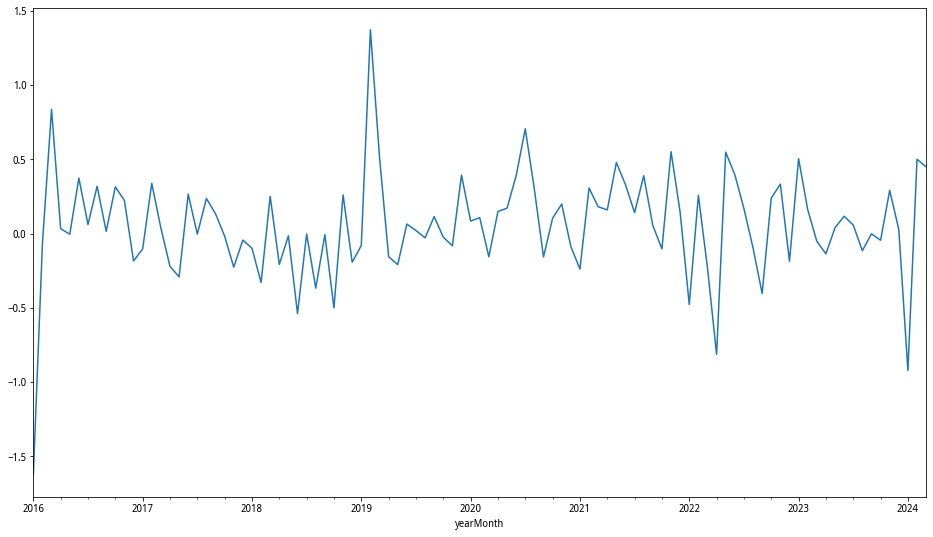

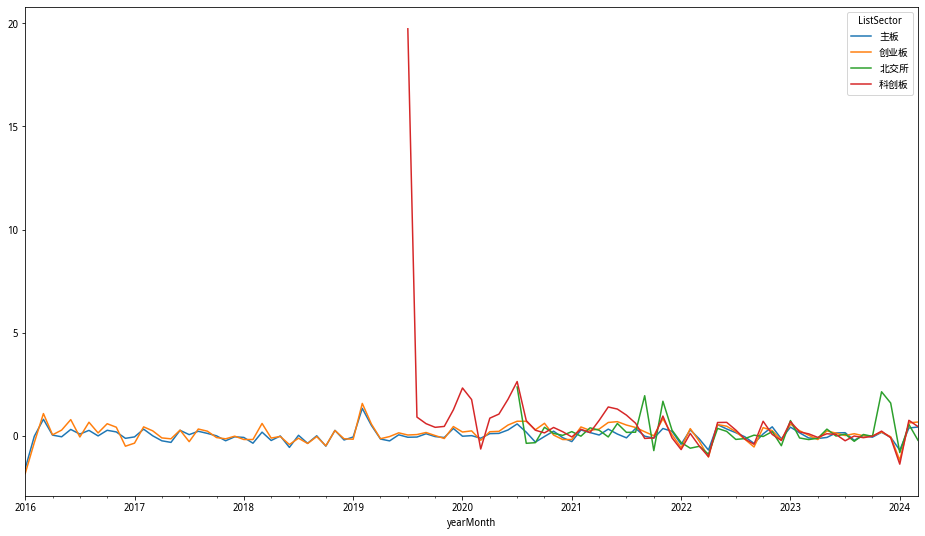

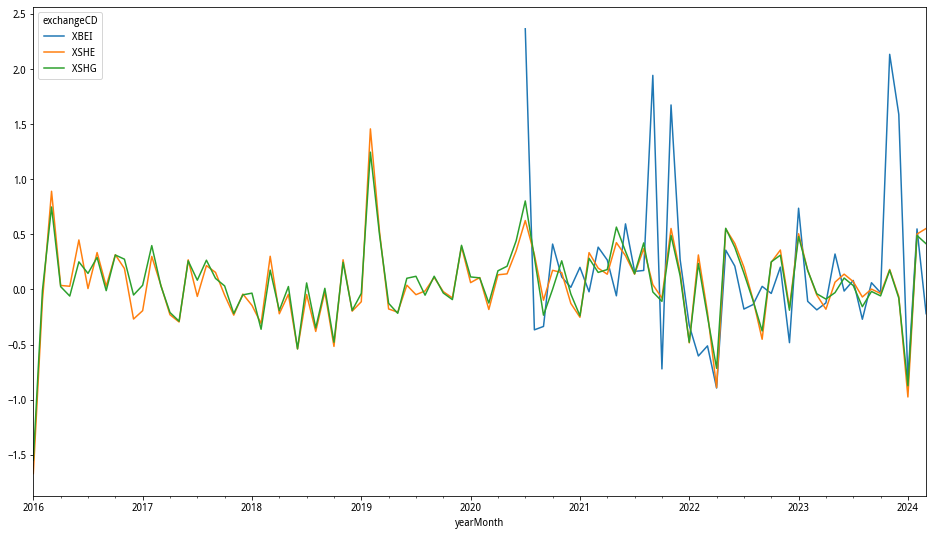

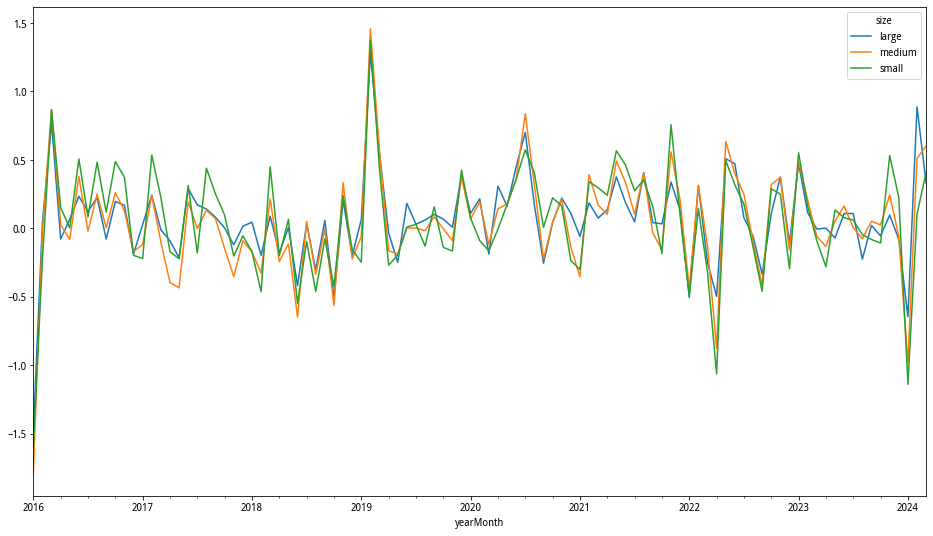

In [138]:
stk_df.groupby(['yearMonth'])['ret'].mean()

(stk_df.groupby(['yearMonth'])['ret'].mean() * 100).plot()

ret_by_sector = stk_df.groupby(['ListSector','yearMonth'])['ret'].mean().reset_index().pivot(index='yearMonth',columns='ListSector',values='ret') * 100

ret_by_sector.plot()

ret_by_exch = stk_df.groupby(['exchangeCD','yearMonth'])['ret'].mean().reset_index().pivot(index='yearMonth',columns='exchangeCD',values='ret') * 100

ret_by_exch.plot()

ret_by_size = stk_df.groupby(['size','yearMonth'])['ret'].mean().reset_index().pivot(index='yearMonth',columns='size',values='ret') * 100

ret_by_size.plot()

## 波动率

In [139]:
stk_df.groupby(['yearMonth','secShortName'])['ret'].std().groupby('yearMonth').mean()

yearMonth
2016-01    0.053362
2016-02    0.041690
2016-03    0.033429
2016-04    0.027933
2016-05    0.029788
2016-06    0.027281
2016-07    0.024331
2016-08    0.020817
2016-09    0.020486
2016-10    0.019659
2016-11    0.020042
2016-12    0.023322
2017-01    0.022820
2017-02    0.017929
2017-03    0.020266
2017-04    0.026272
2017-05    0.024965
2017-06    0.022491
2017-07    0.024529
2017-08    0.020142
2017-09    0.019470
2017-10    0.022260
2017-11    0.023815
2017-12    0.021116
2018-01    0.022195
2018-02    0.033851
2018-03    0.026812
2018-04    0.025392
2018-05    0.024585
2018-06    0.031452
             ...   
2021-10    0.029822
2021-11    0.031702
2021-12    0.028780
2022-01    0.032129
2022-02    0.027007
2022-03    0.031775
2022-04    0.040001
2022-05    0.029102
2022-06    0.028829
2022-07    0.026906
2022-08    0.030545
2022-09    0.027385
2022-10    0.030408
2022-11    0.024626
2022-12    0.023613
2023-01    0.020957
2023-02    0.021346
2023-03    0.021834
2023-04   

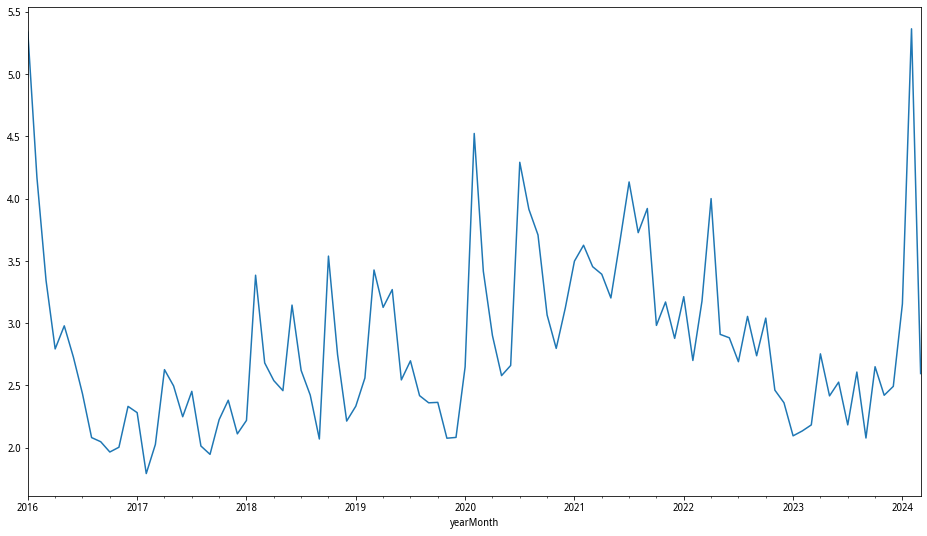

In [140]:
(stk_df.groupby(['yearMonth','secShortName'])['ret'].std().groupby('yearMonth').mean() * 100).plot()

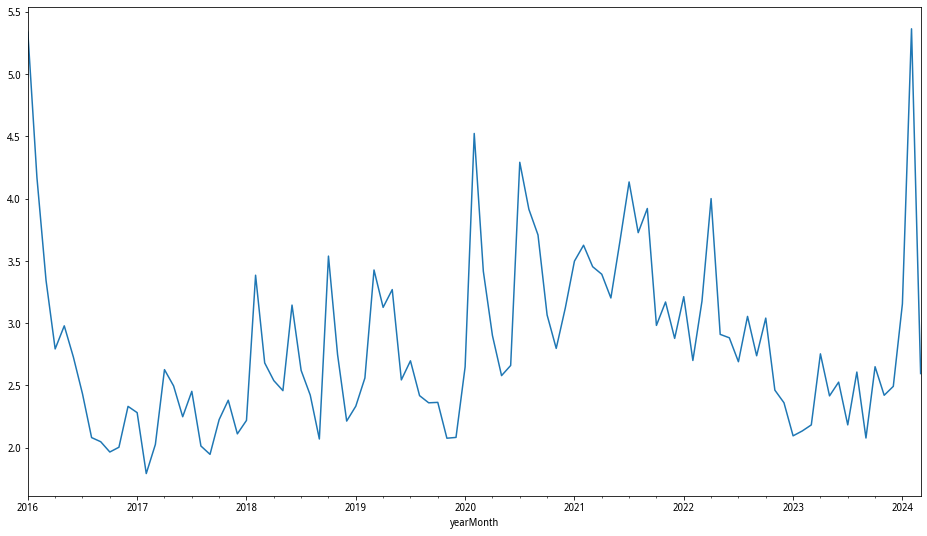

In [141]:
(stk_df.groupby(['yearMonth','secShortName'])['ret'].std().groupby('yearMonth').mean() * 100).plot()

In [142]:
vol = stk_df.groupby(['yearMonth','secShortName'])['ret'].std()

In [143]:
temp = stk_df[['secShortName','yearMonth','ListSector','exchangeCD','size']].drop_duplicates(['secShortName','yearMonth'])

In [144]:
vol = pd.merge(vol,temp,on=['secShortName','yearMonth'])

In [145]:
del temp

In [146]:
vol.rename(columns={'ret':'vol'},inplace=True)

In [147]:
vol.groupby(['ListSector','yearMonth'])['vol'].mean().reset_index().pivot(index='yearMonth',columns='ListSector',values='vol')

ListSector        主板       创业板       北交所       科创板
yearMonth                                         
2016-01     0.052304  0.059927       NaN       NaN
2016-02     0.040908  0.046547       NaN       NaN
2016-03     0.032385  0.039796       NaN       NaN
2016-04     0.026854  0.034548       NaN       NaN
2016-05     0.028522  0.037438       NaN       NaN
2016-06     0.025876  0.035545       NaN       NaN
2016-07     0.023259  0.030713       NaN       NaN
2016-08     0.019737  0.026967       NaN       NaN
2016-09     0.019473  0.026082       NaN       NaN
2016-10     0.018948  0.023473       NaN       NaN
2016-11     0.019392  0.023442       NaN       NaN
2016-12     0.022820  0.025963       NaN       NaN
2017-01     0.022002  0.027178       NaN       NaN
2017-02     0.017302  0.021144       NaN       NaN
2017-03     0.019263  0.025310       NaN       NaN
2017-04     0.025136  0.031893       NaN       NaN
2017-05     0.023864  0.030282       NaN       NaN
2017-06     0.021220  0.028543       NaN       NaN
2017-07     0.023580  0.029050       NaN       NaN
2017-08     0.019828  0.021654       NaN       NaN
2017-09     0.018670  0.023328       NaN       NaN
2017-10     0.021041  0.028117       NaN       NaN
2017-11     0.022630  0.029359       NaN       NaN
2017-12     0.020244  0.025203       NaN       NaN
2018-01     0.021126  0.027119       NaN       NaN
2018-02     0.032906  0.038179       NaN       NaN
2018-03     0.025340  0.033561       NaN       NaN
2018-04     0.023794  0.032666       NaN       NaN
2018-05     0.023140  0.030977       NaN       NaN
2018-06     0.030040  0.037756       NaN       NaN
...              ...       ...       ...       ...
2021-10     0.026228  0.037120  0.031758  0.036589
2021-11     0.023570  0.041388  0.127514  0.039050
2021-12     0.024813  0.037995  0.031271  0.032566
2022-01     0.028630  0.038953  0.041379  0.036283
2022-02     0.025002  0.031365  0.027271  0.029464
2022-03     0.030061  0.036855  0.026535  0.032187
2022-04     0.037971  0.045602  0.030964  0.041659
2022-05     0.028365  0.030192  0.028818  0.030850
2022-06     0.026480  0.030878  0.021436  0.038435
2022-07     0.025781  0.028652  0.015342  0.031899
2022-08     0.027500  0.035038  0.018566  0.039451
2022-09     0.025710  0.027550  0.043928  0.030840
2022-10     0.027060  0.032106  0.023709  0.044125
2022-11     0.022792  0.026431  0.019404  0.030956
2022-12     0.022394  0.024929  0.019624  0.027863
2023-01     0.019310  0.020881  0.022549  0.027732
2023-02     0.018552  0.024053  0.022357  0.028309
2023-03     0.019682  0.025098  0.014049  0.028133
2023-04     0.023612  0.032459  0.018029  0.039096
2023-05     0.020373  0.029021  0.029576  0.029514
2023-06     0.022166  0.029203  0.018971  0.033459
2023-07     0.018257  0.028346  0.021439  0.024925
2023-08     0.020276  0.038212  0.019573  0.030187
2023-09     0.017980  0.024900  0.021724  0.024188
2023-10     0.023065  0.029004  0.044907  0.028278
2023-11     0.018553  0.023355  0.078034  0.025872
2023-12     0.020077  0.024670  0.076432  0.022709
2024-01     0.028907  0.031295  0.062009  0.029344
2024-02     0.044531  0.068196  0.059778  0.060741
2024-03     0.022294  0.030051  0.038944  0.027406

[99 rows x 4 columns]

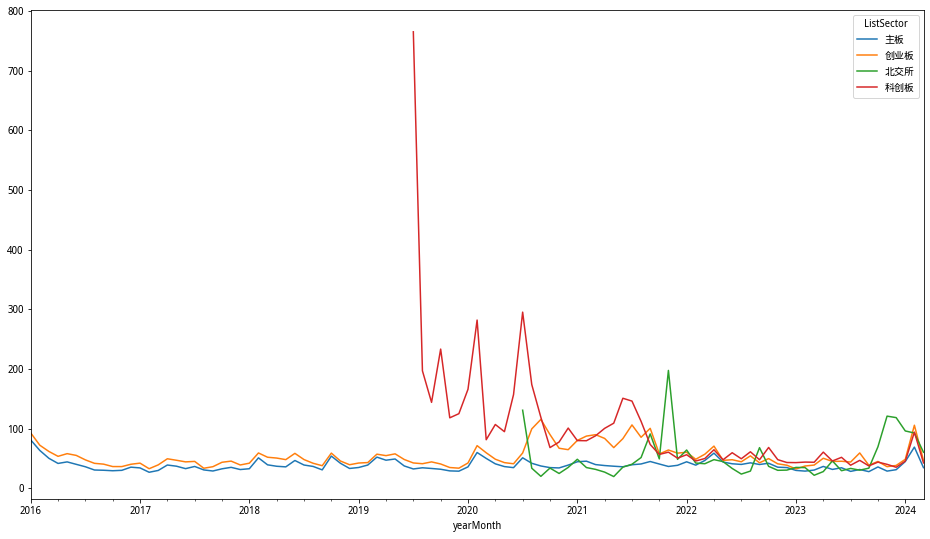

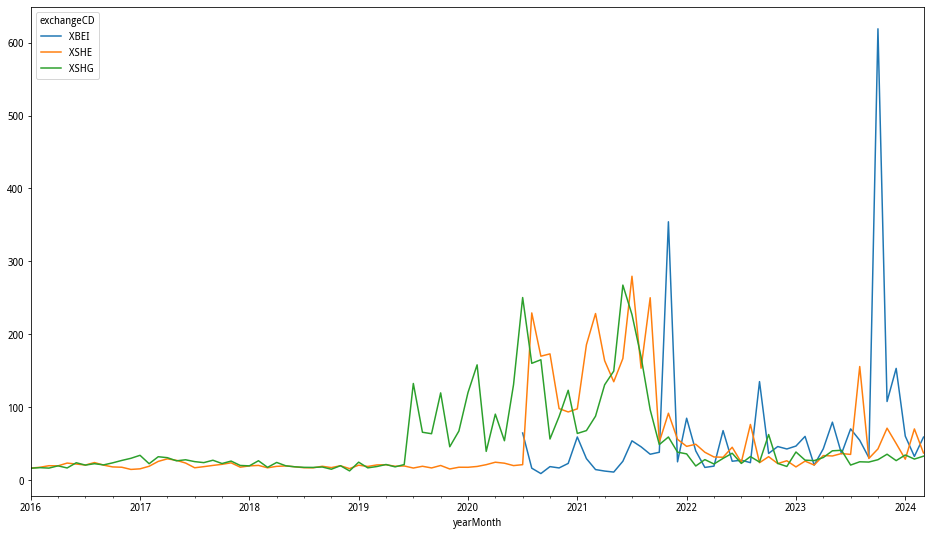

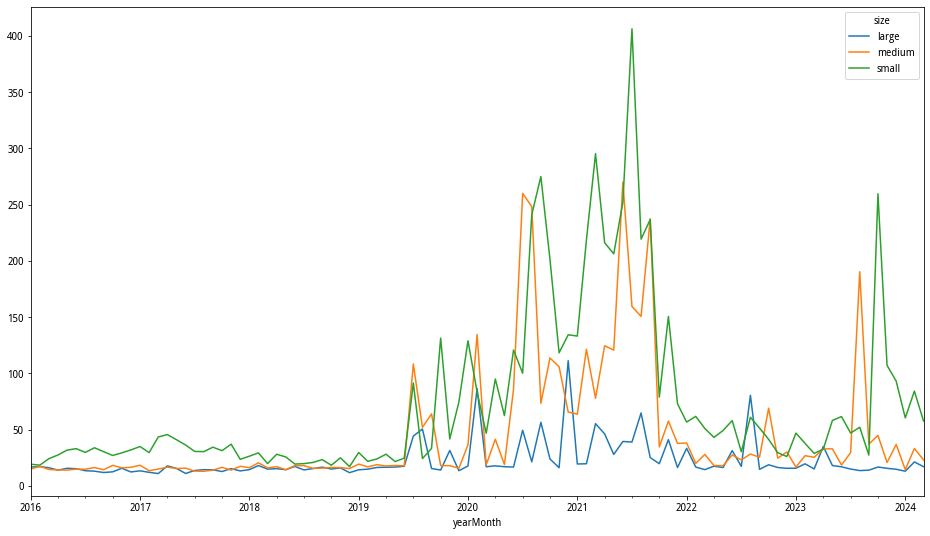

In [148]:
vol_by_sector = vol.groupby(['ListSector','yearMonth'])['vol'].mean().reset_index().pivot(index='yearMonth',columns='ListSector',values='vol') * np.sqrt(240) * 100

vol_by_sector.plot()

vol_by_sector = vol.groupby(['exchangeCD','yearMonth'])['vol'].std().reset_index().pivot(index='yearMonth',columns='exchangeCD',values='vol') * np.sqrt(240) * 100

vol_by_sector.plot()

vol_by_sector = vol.groupby(['size','yearMonth'])['vol'].std().reset_index().pivot(index='yearMonth',columns='size',values='vol') * np.sqrt(240) * 100

vol_by_sector.plot()

## 所有在一起

In [149]:
group = stk_df.groupby(['yearMonth'])[['negMarketValue','turnoverValue','turnoverRate','ret']].agg({'negMarketValue':'sum','turnoverValue':'sum',
                                                                                                    'turnoverRate':'mean','ret':'mean'})

In [150]:
vol_mean = vol.groupby('yearMonth')['vol'].mean()

In [151]:
group = pd.merge(group,vol_mean,on='yearMonth')

In [152]:
# Standardize
from sklearn.preprocessing import StandardScaler

In [153]:
group

negMarketValue  turnoverValue  turnoverRate       ret       vol
yearMonth                                                                 
2016-01      4.272677e+14   6.746314e+12      0.030586 -0.016235  0.053362
2016-02      3.206165e+14   4.844192e+12      0.029707 -0.000664  0.041690
2016-03      4.782268e+14   8.292141e+12      0.032902  0.008365  0.033429
2016-04      4.431071e+14   7.238898e+12      0.033341  0.000325  0.027933
2016-05      4.454225e+14   5.725438e+12      0.026985 -0.000048  0.029788
2016-06      4.424976e+14   7.248399e+12      0.034391  0.003733  0.027281
2016-07      4.923575e+14   8.123795e+12      0.031954  0.000603  0.024331
2016-08      5.519801e+14   7.459994e+12      0.025961  0.003183  0.020817
2016-09      4.805470e+14   5.375322e+12      0.023202  0.000144  0.020486
2016-10      3.956597e+14   4.967615e+12      0.027662  0.003142  0.019659
2016-11      5.612879e+14   8.867737e+12      0.033365  0.002221  0.020042
2016-12      5.520395e+14   6.302507e+12      0.022520 -0.001854  0.023322
2017-01      4.518832e+14   4.163235e+12      0.021047 -0.001039  0.022820
2017-02      4.614932e+14   4.964552e+12      0.024237  0.003378  0.017929
2017-03      6.008731e+14   7.216809e+12      0.029327  0.000369  0.020266
2017-04      4.625207e+14   5.720815e+12      0.026398 -0.002212  0.026272
2017-05      4.947731e+14   5.104187e+12      0.025790 -0.002922  0.024965
2017-06      5.607937e+14   5.515080e+12      0.025234  0.002652  0.022491
2017-07      5.546283e+14   6.445001e+12      0.026188 -0.000045  0.024529
2017-08      6.239423e+14   7.399817e+12      0.026470  0.002361  0.020142
2017-09      5.929370e+14   7.252311e+12      0.029468  0.001331  0.019470
2017-10      4.904322e+14   5.010625e+12      0.026464 -0.000181  0.022260
2017-11      6.451162e+14   7.207957e+12      0.025622 -0.002268  0.023815
2017-12      6.000761e+14   5.223532e+12      0.021098 -0.000444  0.021116
2018-01      6.617467e+14   7.599034e+12      0.025355 -0.000996  0.022195
2018-02      4.201393e+14   4.256757e+12      0.021768 -0.003297  0.033851
2018-03      6.231907e+14   6.447724e+12      0.028720  0.002506  0.026812
2018-04      4.973459e+14   5.152005e+12      0.030402 -0.002083  0.025392
2018-05      6.178945e+14   5.763021e+12      0.028613 -0.000155  0.024585
2018-06      5.301170e+14   4.516481e+12      0.024658 -0.005392  0.031452
...                   ...            ...           ...       ...       ...
2021-10      7.765503e+14   1.065749e+13      0.026328 -0.001040  0.029822
2021-11      1.074839e+15   1.637358e+13      0.034785  0.005510  0.031702
2021-12      1.164641e+15   1.702104e+13      0.033966  0.001431  0.028780
2022-01      9.434940e+14   1.338021e+13      0.033212 -0.004781  0.032129
2022-02      7.765314e+14   9.856054e+12      0.029452  0.002573  0.027007
2022-03      1.052397e+15   1.537462e+13      0.032149 -0.002315  0.031775
2022-04      8.242770e+14   1.122121e+13      0.030280 -0.008138  0.040001
2022-05      8.123195e+14   1.080348e+13      0.030052  0.005476  0.029102
2022-06      9.722499e+14   1.552037e+13      0.033386  0.003965  0.028829
2022-07      9.977907e+14   1.421794e+13      0.030873  0.001679  0.026906
2022-08      1.086493e+15   1.559656e+13      0.032444 -0.000964  0.030545
2022-09      9.591692e+14   1.034840e+13      0.025134 -0.004042  0.027385
2022-10      6.976578e+14   8.634856e+12      0.027851  0.002392  0.030408
2022-11      9.909230e+14   1.384340e+13      0.030759  0.003325  0.024626
2022-12      1.017649e+15   1.180882e+13      0.025922 -0.001871  0.023613
2023-01      7.658036e+14   8.545287e+12      0.023669  0.005044  0.020957
2023-02      9.906510e+14   1.216132e+13      0.028769  0.001615  0.021346
2023-03      1.136198e+15   1.454949e+13      0.027331 -0.000520  0.021834
2023-04      9.572923e+14   1.479724e+13      0.030006 -0.001372  0.027539
2023-05      9.899357e+14   1.283617e+13      0.027671  0.000391  0.024165
2023-06      9.868801e+14   1.326371

In [154]:
group[['negMarketValue','turnoverValue','turnoverRate']] = StandardScaler().fit(group[['negMarketValue','turnoverValue','turnoverRate']]).transform(group[['negMarketValue','turnoverValue','turnoverRate']])

In [155]:
group

negMarketValue  turnoverValue  turnoverRate       ret       vol
yearMonth                                                                 
2016-01         -1.320972      -0.641723      0.413229 -0.016235  0.053362
2016-02         -1.802618      -1.124046      0.233738 -0.000664  0.041690
2016-03         -1.090836      -0.249746      0.886685  0.008365  0.033429
2016-04         -1.249439      -0.516818      0.976394  0.000325  0.027933
2016-05         -1.238983      -0.900587     -0.322578 -0.000048  0.029788
2016-06         -1.252192      -0.514409      1.191043  0.003733  0.027281
2016-07         -1.027020      -0.292434      0.692824  0.000603  0.024331
2016-08         -0.757759      -0.460755     -0.532004  0.003183  0.020817
2016-09         -1.080357      -0.989367     -1.095863  0.000144  0.020486
2016-10         -1.463716      -1.092749     -0.184322  0.003142  0.019659
2016-11         -0.715724      -0.103792      0.981233  0.002221  0.020042
2016-12         -0.757491      -0.754259     -1.235313 -0.001854  0.023322
2017-01         -1.209806      -1.296716     -1.536390 -0.001039  0.022820
2017-02         -1.166406      -1.093526     -0.884421  0.003378  0.017929
2017-03         -0.536954      -0.522419      0.156020  0.000369  0.020266
2017-04         -1.161766      -0.901760     -0.442620 -0.002212  0.026272
2017-05         -1.016111      -1.058119     -0.566875 -0.002922  0.024965
2017-06         -0.717956      -0.953928     -0.680567  0.002652  0.022491
2017-07         -0.745799      -0.718127     -0.485477 -0.000045  0.024529
2017-08         -0.432771      -0.476014     -0.427940  0.002361  0.020142
2017-09         -0.572794      -0.513417      0.184751  0.001331  0.019470
2017-10         -1.035715      -1.081843     -0.429090 -0.000181  0.022260
2017-11         -0.337148      -0.524664     -0.601236 -0.002268  0.023815
2017-12         -0.540553      -1.027856     -1.525875 -0.000444  0.021116
2018-01         -0.262043      -0.425498     -0.655863 -0.000996  0.022195
2018-02         -1.353164      -1.273002     -1.388921 -0.003297  0.033851
2018-03         -0.436166      -0.717437      0.031861  0.002506  0.026812
2018-04         -1.004492      -1.045993      0.375658 -0.002083  0.025392
2018-05         -0.460084      -0.891057      0.010141 -0.000155  0.024585
2018-06         -0.856495      -1.207144     -0.798205 -0.005392  0.031452
...                   ...            ...           ...       ...       ...
2021-10          0.256420       0.350036     -0.456879 -0.001040  0.029822
2021-11          1.603517       1.799472      1.271459  0.005510  0.031702
2021-12          2.009070       1.963647      1.104126  0.001431  0.028780
2022-01          1.010352       1.040439      0.949944 -0.004781  0.032129
2022-02          0.256335       0.146816      0.181531  0.002573  0.027007
2022-03          1.502170       1.546163      0.732854 -0.002315  0.031775
2022-04          0.471958       0.492979      0.350855 -0.008138  0.040001
2022-05          0.417957       0.387055      0.304156  0.005476  0.029102
2022-06          1.140217       1.583122      0.985604  0.003965  0.028829
2022-07          1.255561       1.252864      0.471882  0.001679  0.026906
2022-08          1.656147       1.602440      0.793109 -0.000964  0.030545
2022-09          1.081143       0.271661     -0.700953 -0.004042  0.027385
2022-10         -0.099866      -0.162844     -0.145673  0.002392  0.030408
2022-11          1.224546       1.157891      0.448655  0.003325  0.024626
2022-12          1.345245       0.641980     -0.539894 -0.001871  0.023613
2023-01          0.207887      -0.185556     -1.000337  0.005044  0.020957
2023-02          1.223317       0.731363      0.041877  0.001615  0.021346
2023-03          1.880622       1.336934     -0.251919 -0.000520  0.021834
2023-04          1.072667       1.399757      0.294725 -0.001372  0.027539
2023-05          1.220087       0.902486     -0.182412  0.000391  0.024165
2023-06          1.206288       1.01

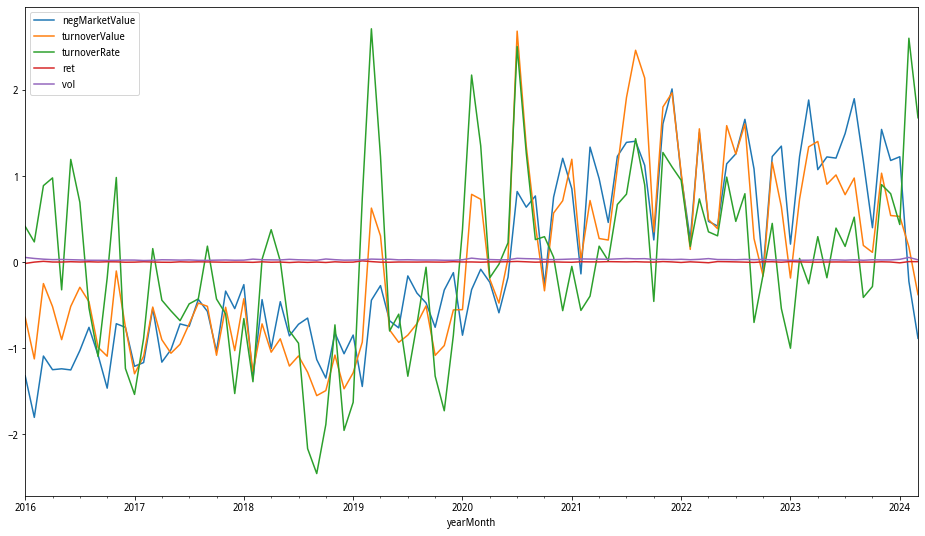

In [156]:
group.plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3852a21d90>,
      dtype=object)

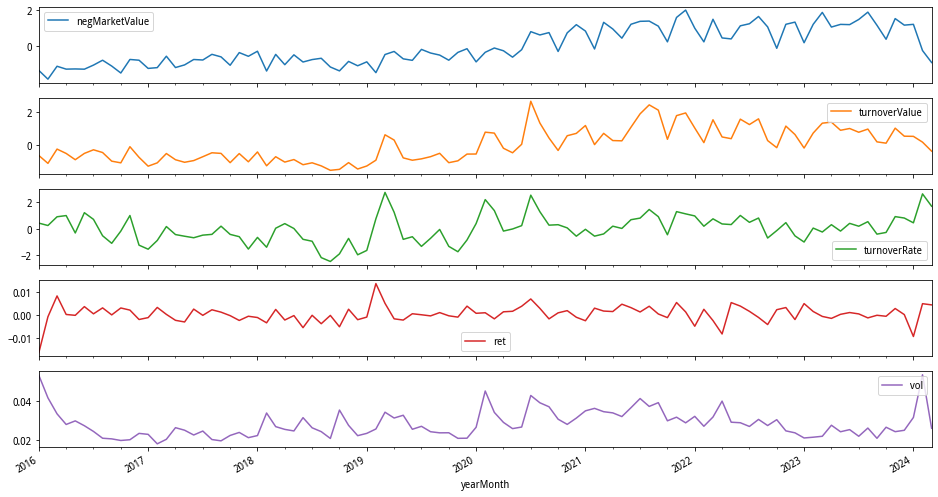

In [157]:
group.plot(subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f385200fe90>,
      dtype=object)

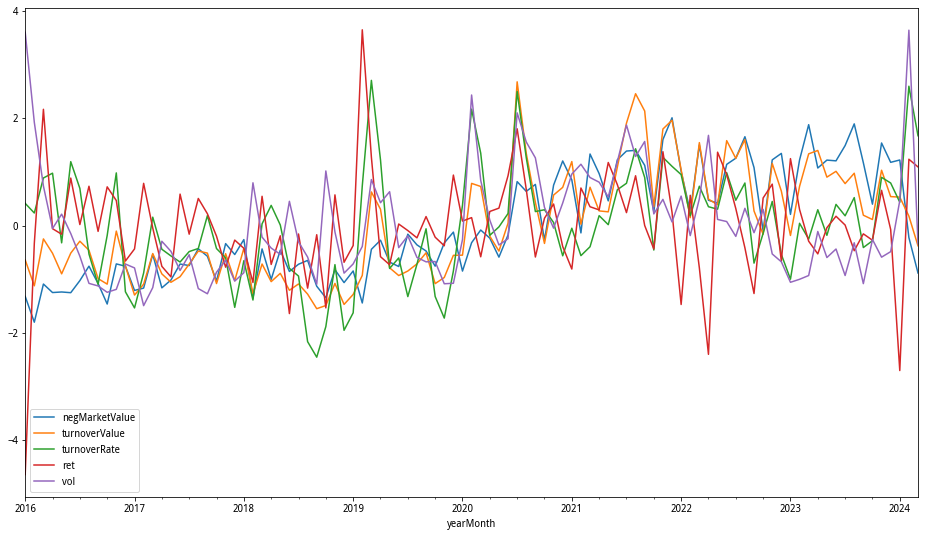

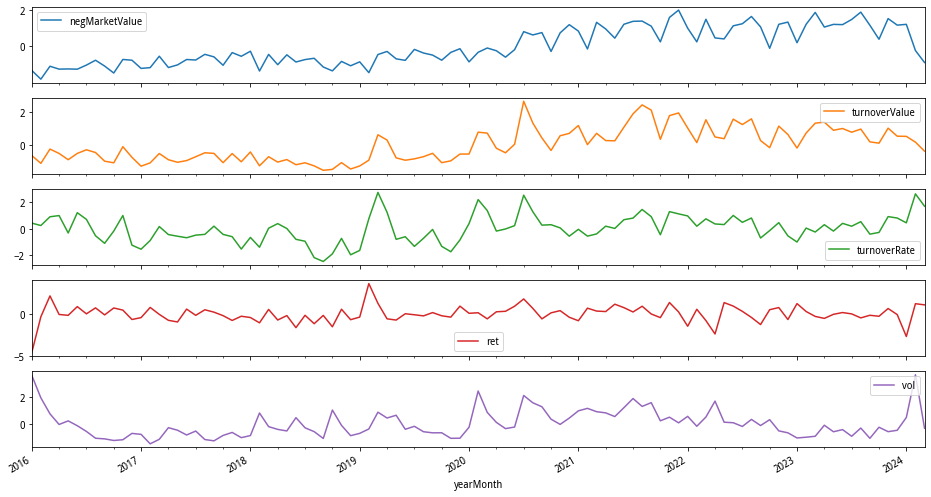

In [158]:
group[group.columns] = StandardScaler().fit(group).transform(group)

group.plot()

group.plot(subplots=True)

In [159]:
group[['turnoverRate','ret']].corr()

turnoverRate      ret
turnoverRate       1.00000  0.32317
ret                0.32317  1.00000

In [160]:
group[['turnoverValue','ret']].corr()

turnoverValue       ret
turnoverValue       1.000000  0.171939
ret                 0.171939  1.000000

In [161]:
group.corr()

negMarketValue  turnoverValue  turnoverRate       ret  \
negMarketValue        1.000000       0.872521      0.340288  0.035488   
turnoverValue         0.872521       1.000000      0.657318  0.171939   
turnoverRate          0.340288       0.657318      1.000000  0.323170   
ret                   0.035488       0.171939      0.323170  1.000000   
vol                   0.146759       0.392280      0.516263 -0.159467   

                     vol  
negMarketValue  0.146759  
turnoverValue   0.392280  
turnoverRate    0.516263  
ret            -0.159467  
vol             1.000000

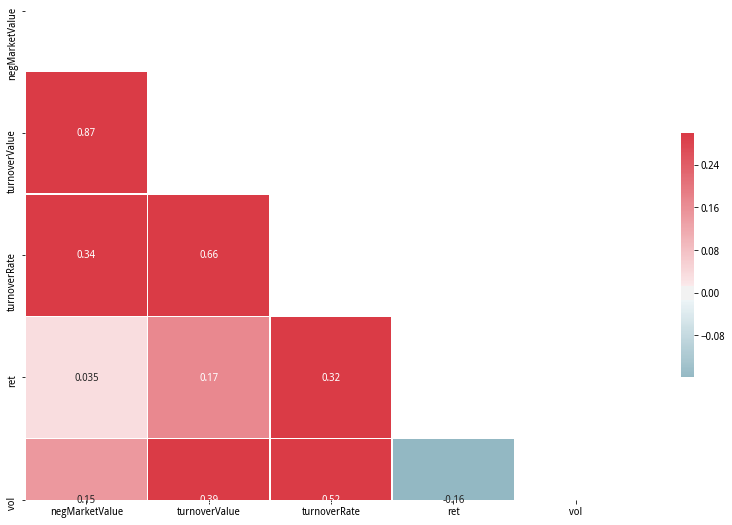

In [162]:
corr = group.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, annot_kws={"size": 10},cbar_kws={"shrink": .5})